# Simulation results - v1 run with 100 blocks and 50 iterations

#### Maria Silva, May 2025

## 1. Imports and settings

Let's start by importing the necessary libraries and setting up some directories and files.


In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [2]:
# plotting theme
sns.set_theme(
    style="whitegrid", palette="Set2", rc={"figure.dpi": 500, "axes.titlesize": 15}
)

In [3]:
# Main directories and files
current_path = os.getcwd()
repo_dir = os.path.abspath(os.path.join(current_path, ".."))
data_dir = os.path.join(repo_dir, "data")
sim_dir = os.path.join(data_dir, "sim_100")

## 2. Load simulation results

Now, we need to read the csv files that contain the results from the simulation results.

In [7]:
file_names_list = [file for file in os.listdir(sim_dir) if file.endswith(".csv")]
sim_results_df = pd.DataFrame()
for file_name in file_names_list:
    df = pd.read_csv(os.path.join(sim_dir, file_name))
    df["file_name"] = file_name
    sim_results_df = pd.concat([sim_results_df, df], ignore_index=True)
    
sim_results_df["gas_used_million"] = sim_results_df["gas_used"]/1e6

sim_results_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281414 entries, 0 to 281413
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   iter                 281400 non-null  float64
 1   block                281400 non-null  float64
 2   utilization          281414 non-null  float64
 3   gas_used             281414 non-null  float64
 4   one_dim_utilization  281414 non-null  float64
 5   throughput           281414 non-null  int64  
 6   mempool_size         281414 non-null  float64
 7   demand_type          281400 non-null  object 
 8   demand_mul           210000 non-null  float64
 9   meter_scheme         281414 non-null  object 
 10  limit                281414 non-null  float64
 11  file_name            281414 non-null  object 
 12  gas_used_million     281414 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 27.9+ MB


In [8]:
# Compute average per iteration
agg_sim_results_df = (
    sim_results_df
    .fillna("")
    .drop(columns=["iter", "mempool_size"])
    .groupby(["block", "demand_type", "demand_mul", "meter_scheme", "limit", "file_name"])
    .mean()
    .reset_index()
    )
agg_sim_results_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7014 entries, 0 to 7013
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   block                7014 non-null   object 
 1   demand_type          7014 non-null   object 
 2   demand_mul           7014 non-null   object 
 3   meter_scheme         7014 non-null   object 
 4   limit                7014 non-null   float64
 5   file_name            7014 non-null   object 
 6   utilization          7014 non-null   float64
 7   gas_used             7014 non-null   float64
 8   one_dim_utilization  7014 non-null   float64
 9   throughput           7014 non-null   float64
 10  gas_used_million     7014 non-null   float64
dtypes: float64(6), object(5)
memory usage: 602.9+ KB


In [9]:
limit_agg_sim_results_df = agg_sim_results_df[agg_sim_results_df["limit"]==36000000.0]

In [13]:
meter_order = sim_results_df["meter_scheme"].unique().tolist()

## 3. Utilization by metering

In [16]:
file_name = "eth_transfer_sim_results.csv"
scenario_title = "Scenario 1: Infinite demand for ETH transfers"

sim_results_df[sim_results_df["file_name"]==file_name][["meter_scheme", "limit", "utilization"]]

meter_scheme       limit  utilization
70000                        one_dim_scheme  36000000.0     0.999833
70001                        one_dim_scheme  18000000.0     0.999833
70002                     compute_vs_others  36000000.0     1.000000
70003                     compute_vs_others  18000000.0     1.000000
70004                       state_vs_others  36000000.0     0.999833
70005                       state_vs_others  18000000.0     0.999833
70006                      access_vs_others  36000000.0     0.999925
70007                      access_vs_others  18000000.0     0.999350
70008                   bandwidth_vs_others  36000000.0     0.999600
70009                   bandwidth_vs_others  18000000.0     0.999600
70010            state_vs_compute_vs_others  36000000.0     1.000000
70011            state_vs_compute_vs_others  18000000.0     1.000000
70012  state_vs_compute_vs_access_vs_others  36000000.0     0.999722
70013  state_vs_compute_vs_access_vs_others  18000000.0     0.999722

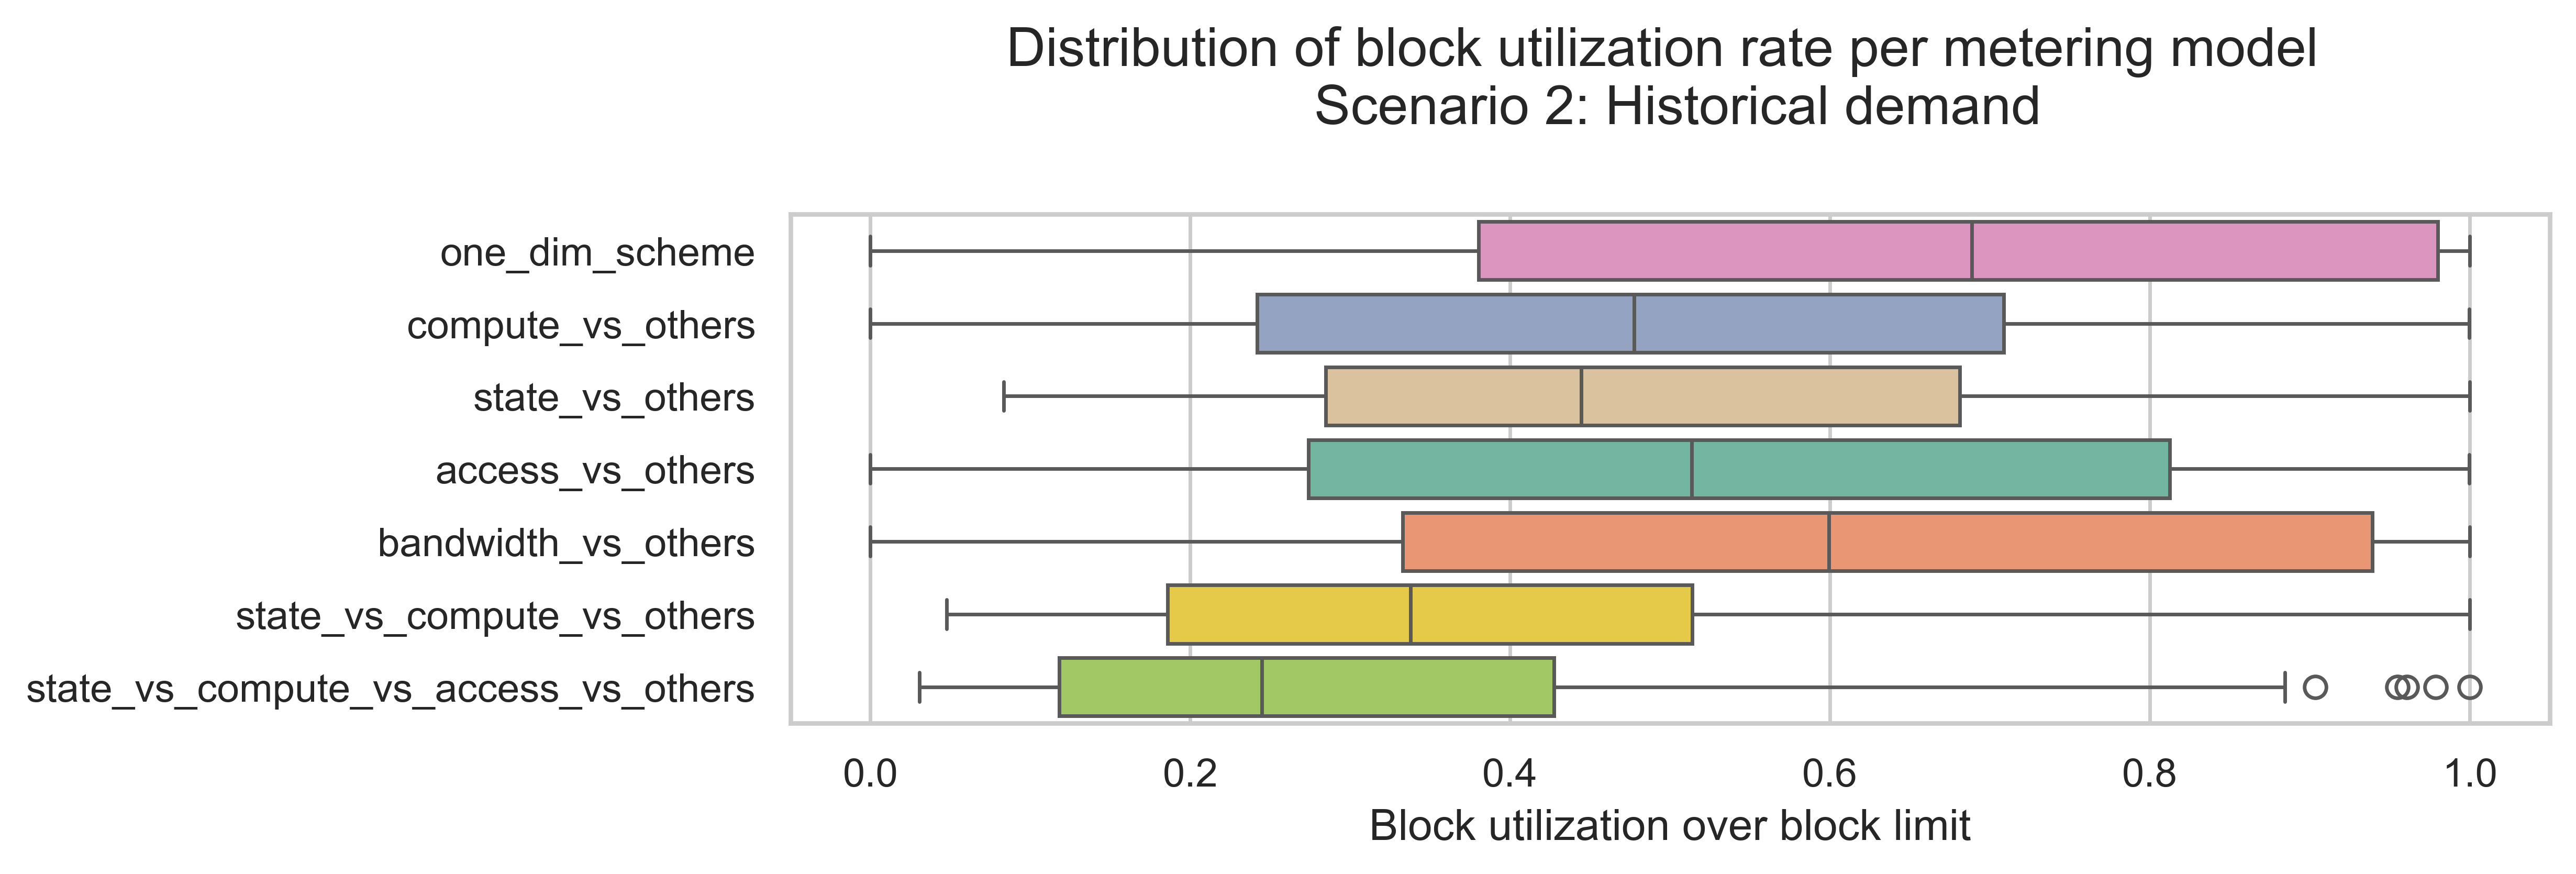

In [24]:
file_name = "historical_txs_sim_results_demand=historical_mul=None.csv"
scenario_title = "Scenario 2: Historical demand"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_sim_results_df[agg_sim_results_df["file_name"]==file_name],
    x="utilization",
    y="meter_scheme",
    hue="meter_scheme",
    legend=False,
    order=meter_order,
)
plt.xlabel("Block utilization over block limit")
plt.ylabel("")
plt.title(
    f"Distribution of block utilization rate per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

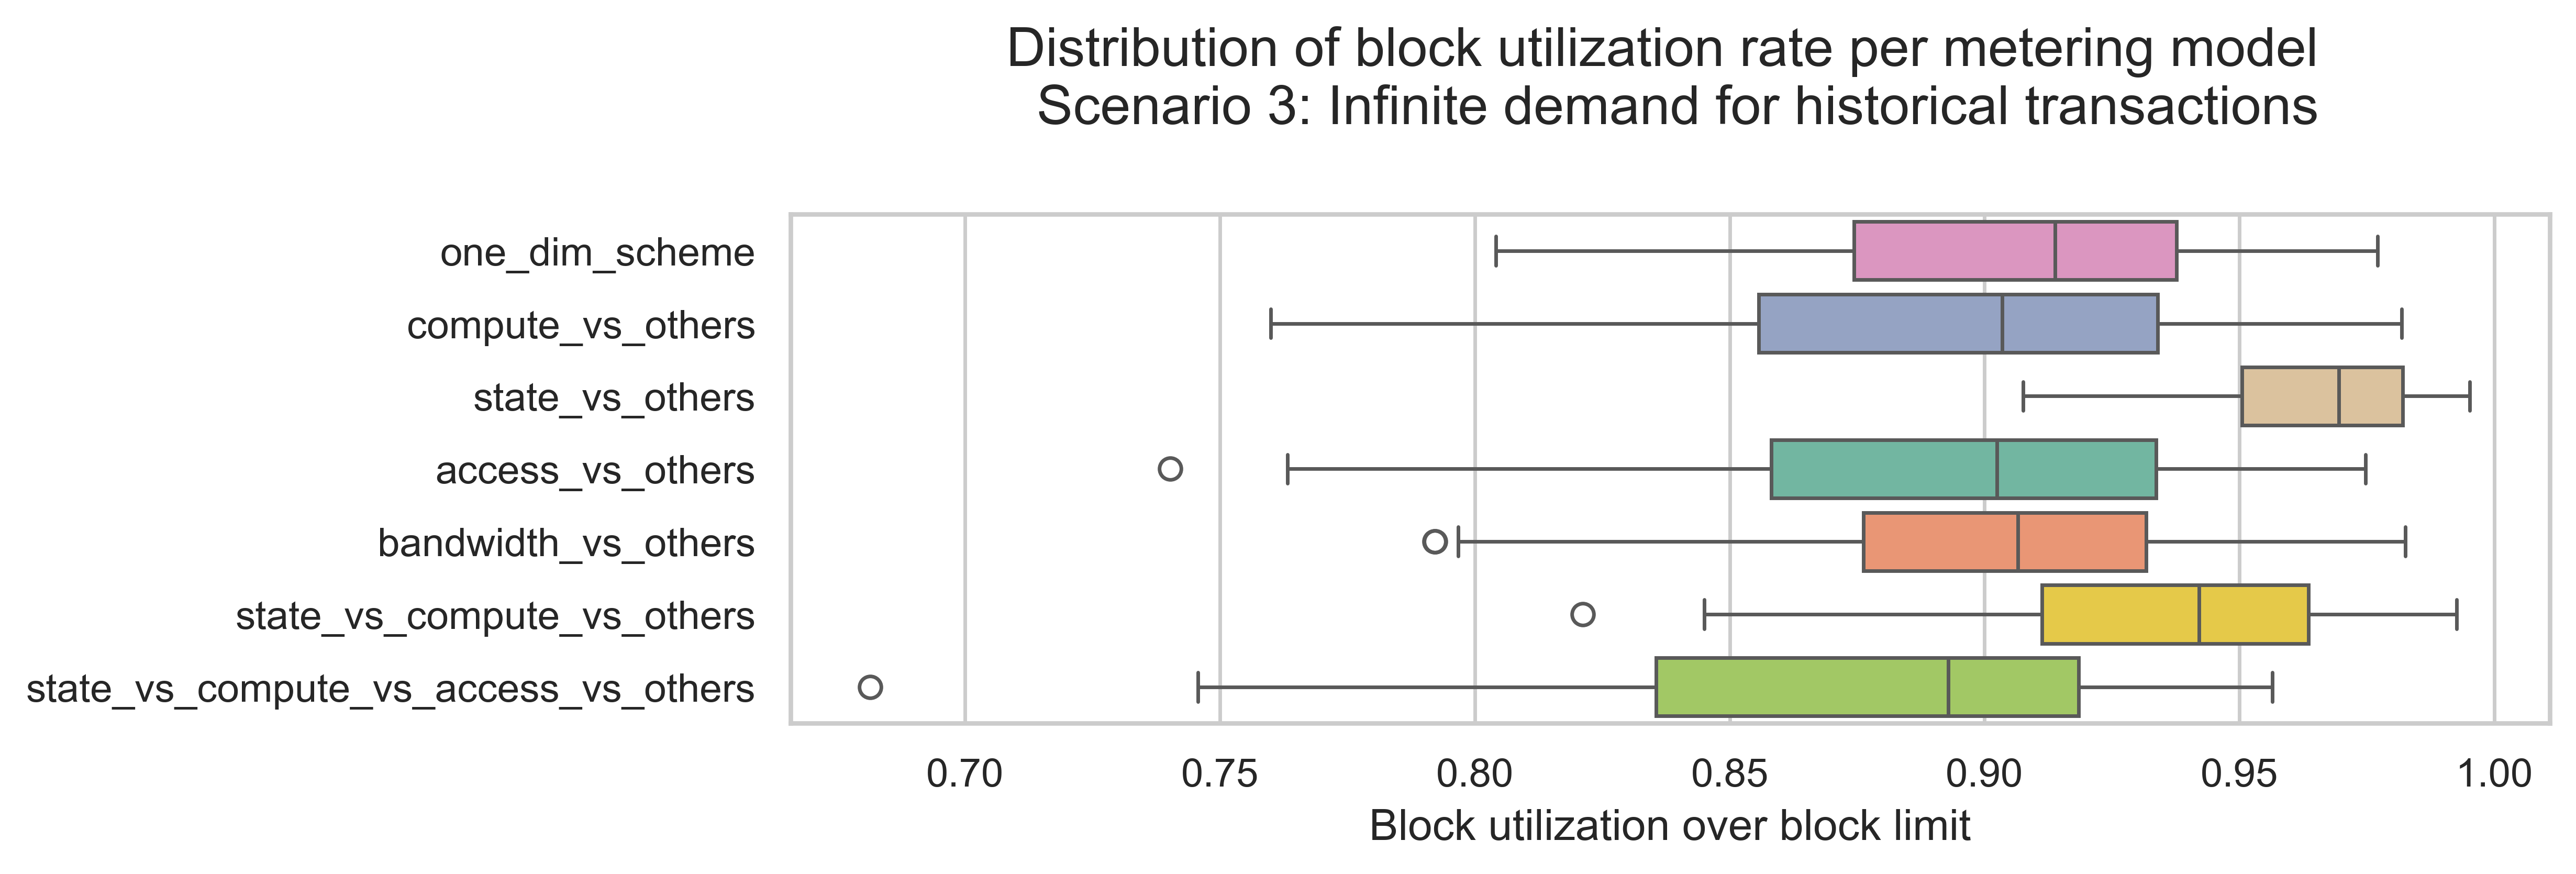

In [18]:
file_name = "historical_txs_sim_results_demand=infinite_mul=None.csv"
scenario_title = "Scenario 3: Infinite demand for historical transactions"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_sim_results_df[agg_sim_results_df["file_name"]==file_name],
    x="utilization",
    y="meter_scheme",
    hue="meter_scheme",
    legend=False,
    order=meter_order,
)
plt.xlabel("Block utilization over block limit")
plt.ylabel("")
plt.title(
    f"Distribution of block utilization rate per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

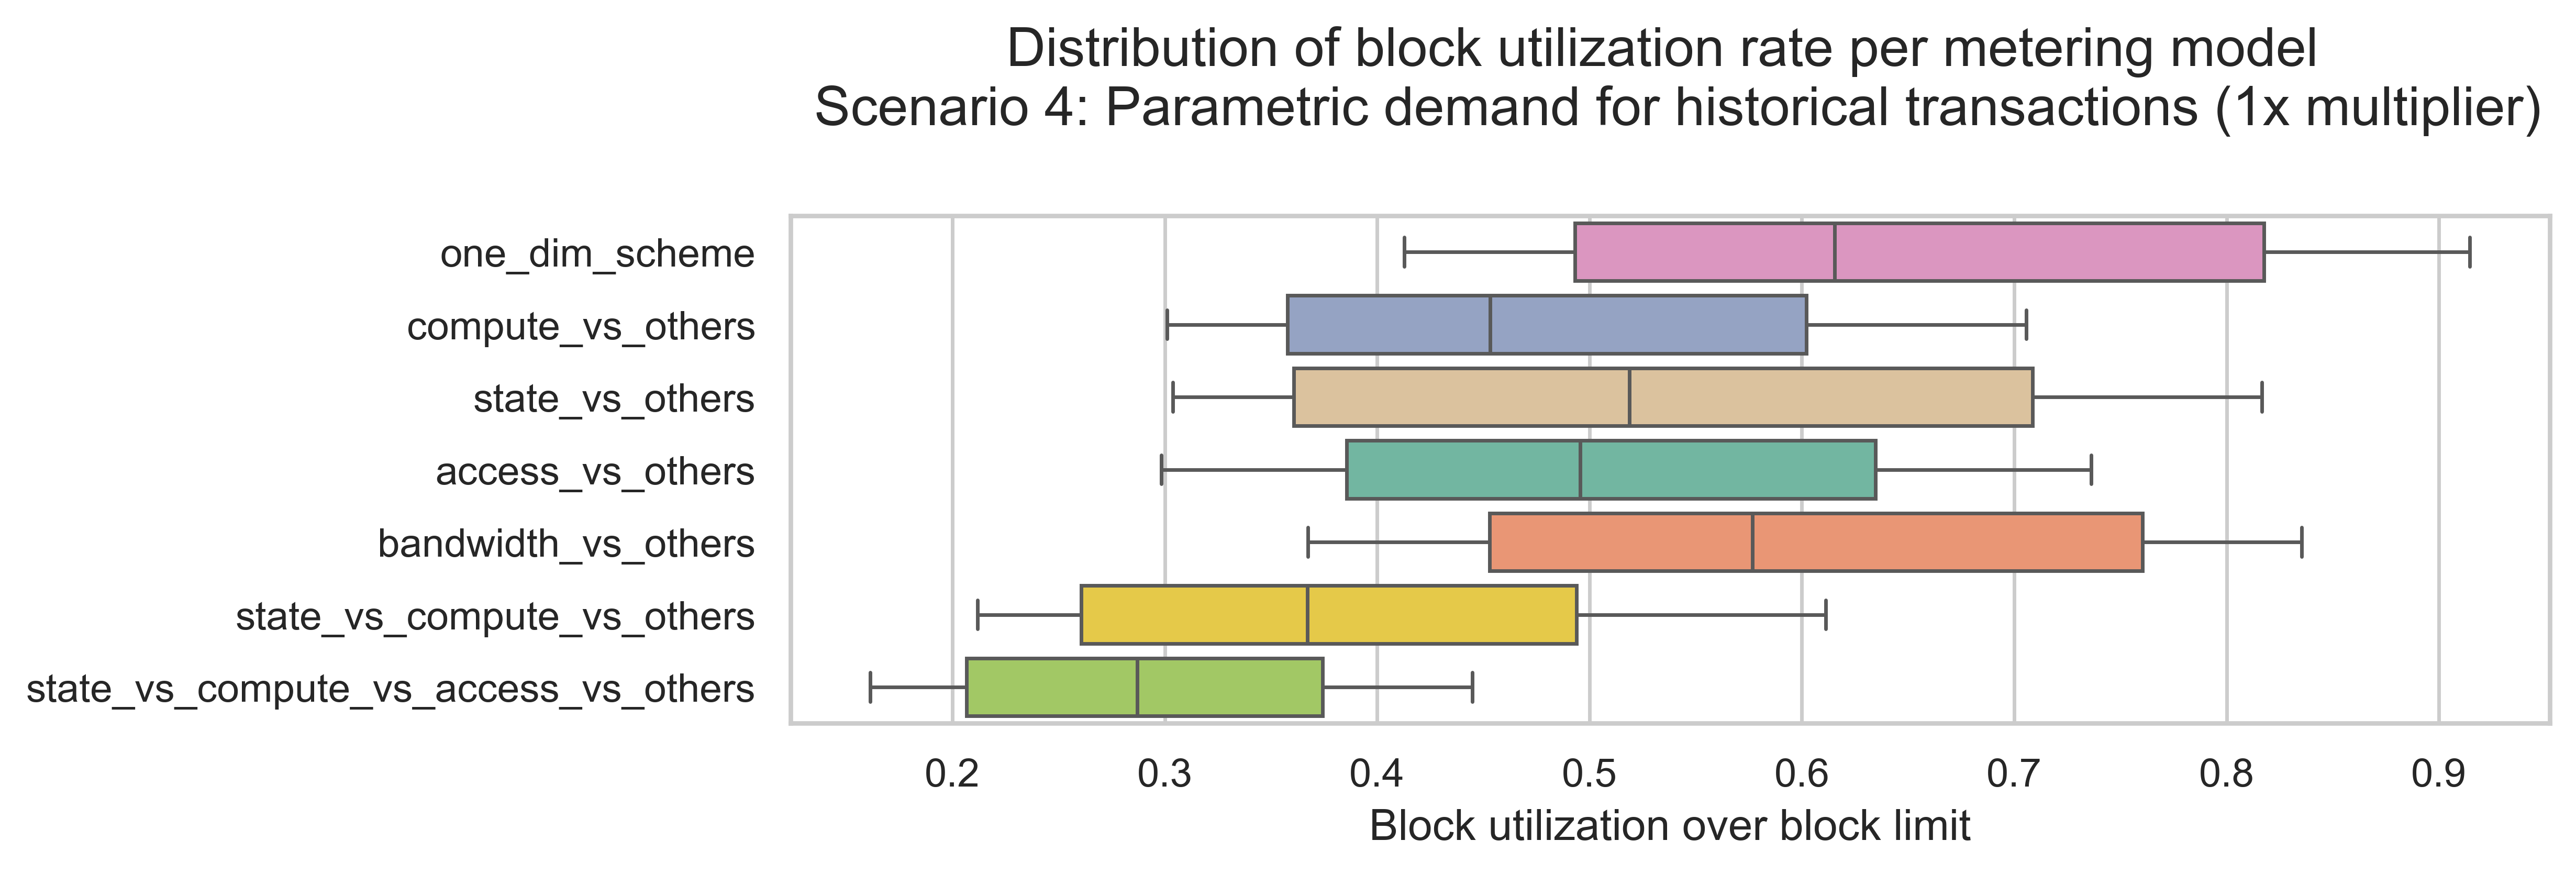

In [19]:
file_name = "historical_txs_sim_results_demand=parametric_mul=1.csv"
scenario_title = "Scenario 4: Parametric demand for historical transactions (1x multiplier)"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_sim_results_df[agg_sim_results_df["file_name"]==file_name],
    x="utilization",
    y="meter_scheme",
    hue="meter_scheme",
    legend=False,
    order=meter_order,
)
plt.xlabel("Block utilization over block limit")
plt.ylabel("")
plt.title(
    f"Distribution of block utilization rate per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

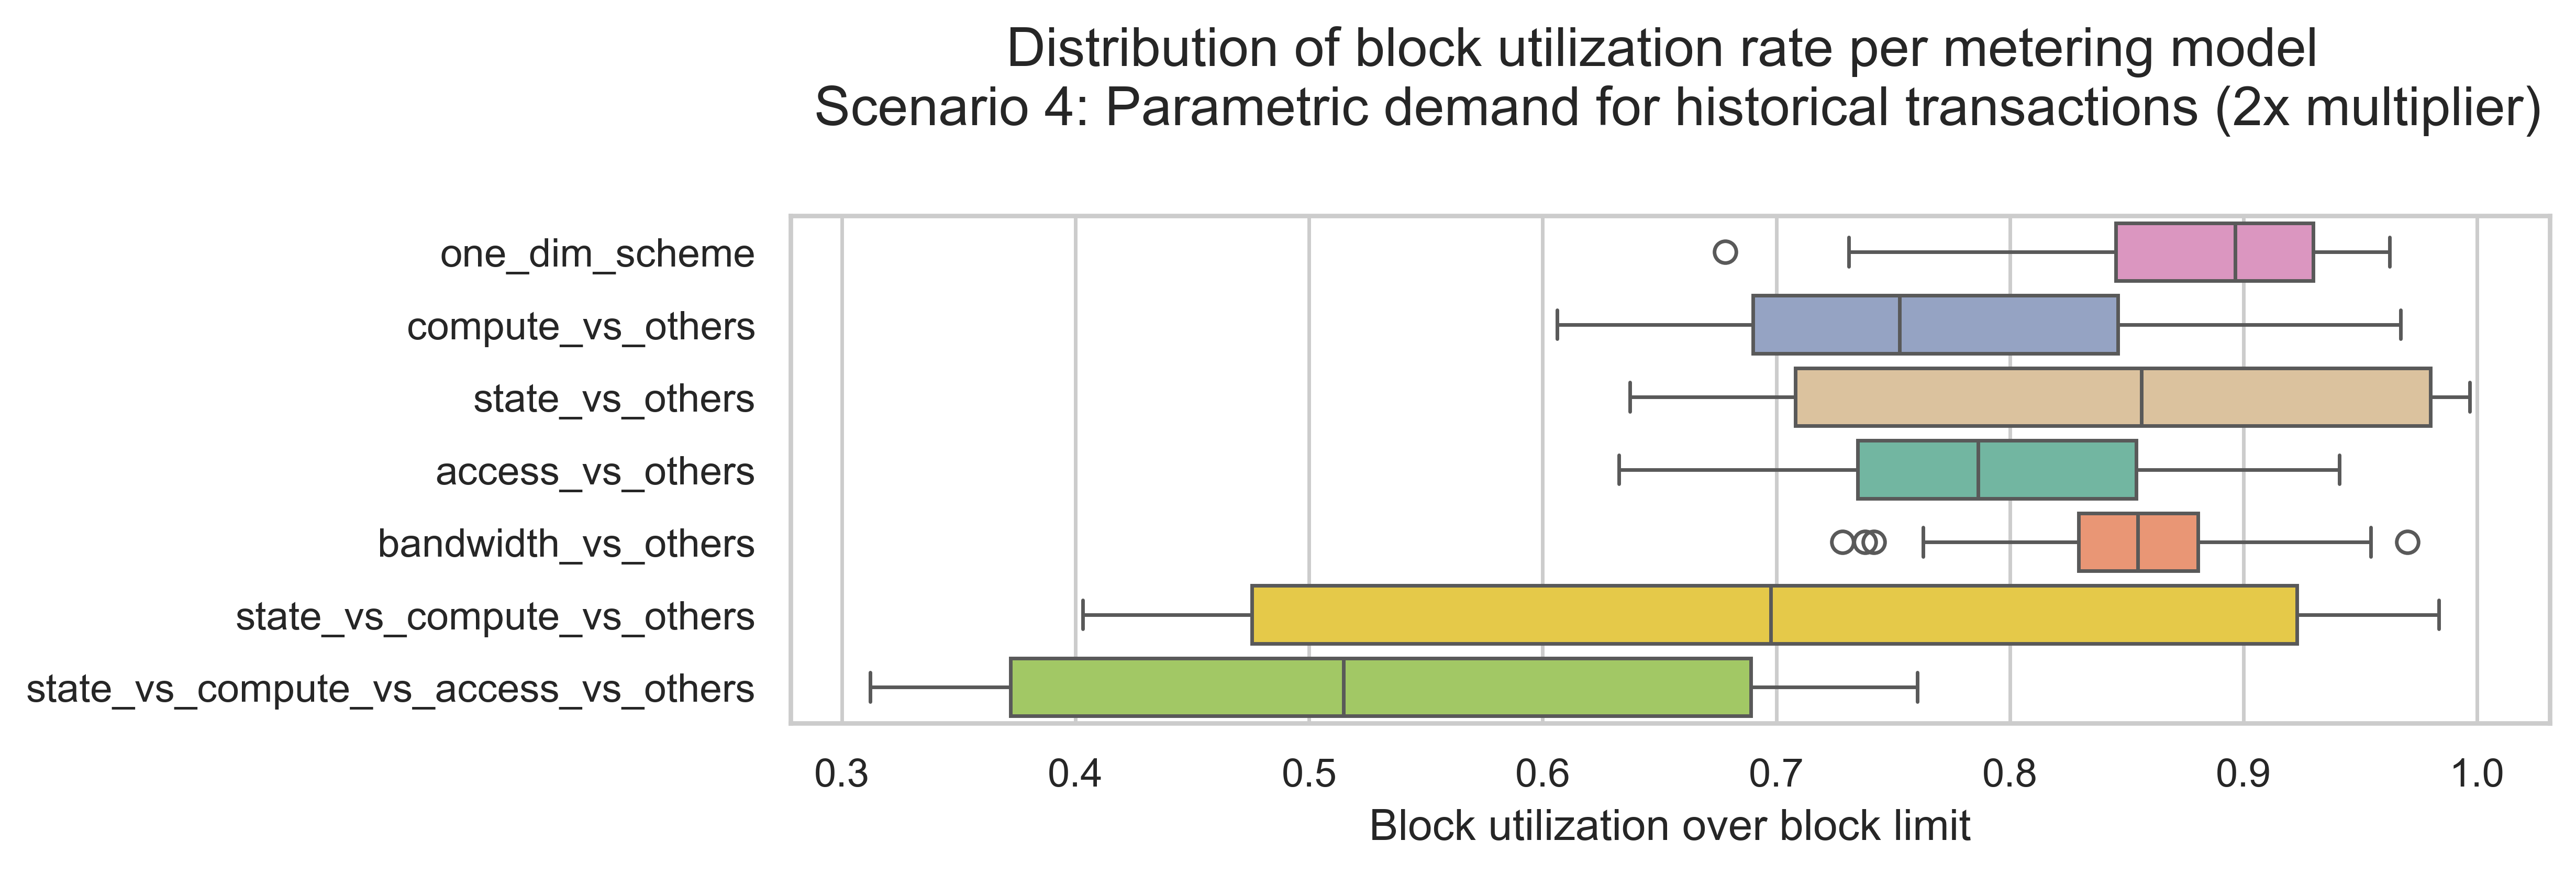

In [20]:
file_name = "historical_txs_sim_results_demand=parametric_mul=2.csv"
scenario_title = "Scenario 4: Parametric demand for historical transactions (2x multiplier)"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_sim_results_df[agg_sim_results_df["file_name"]==file_name],
    x="utilization",
    y="meter_scheme",
    hue="meter_scheme",
    legend=False,
    order=meter_order,
)
plt.xlabel("Block utilization over block limit")
plt.ylabel("")
plt.title(
    f"Distribution of block utilization rate per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

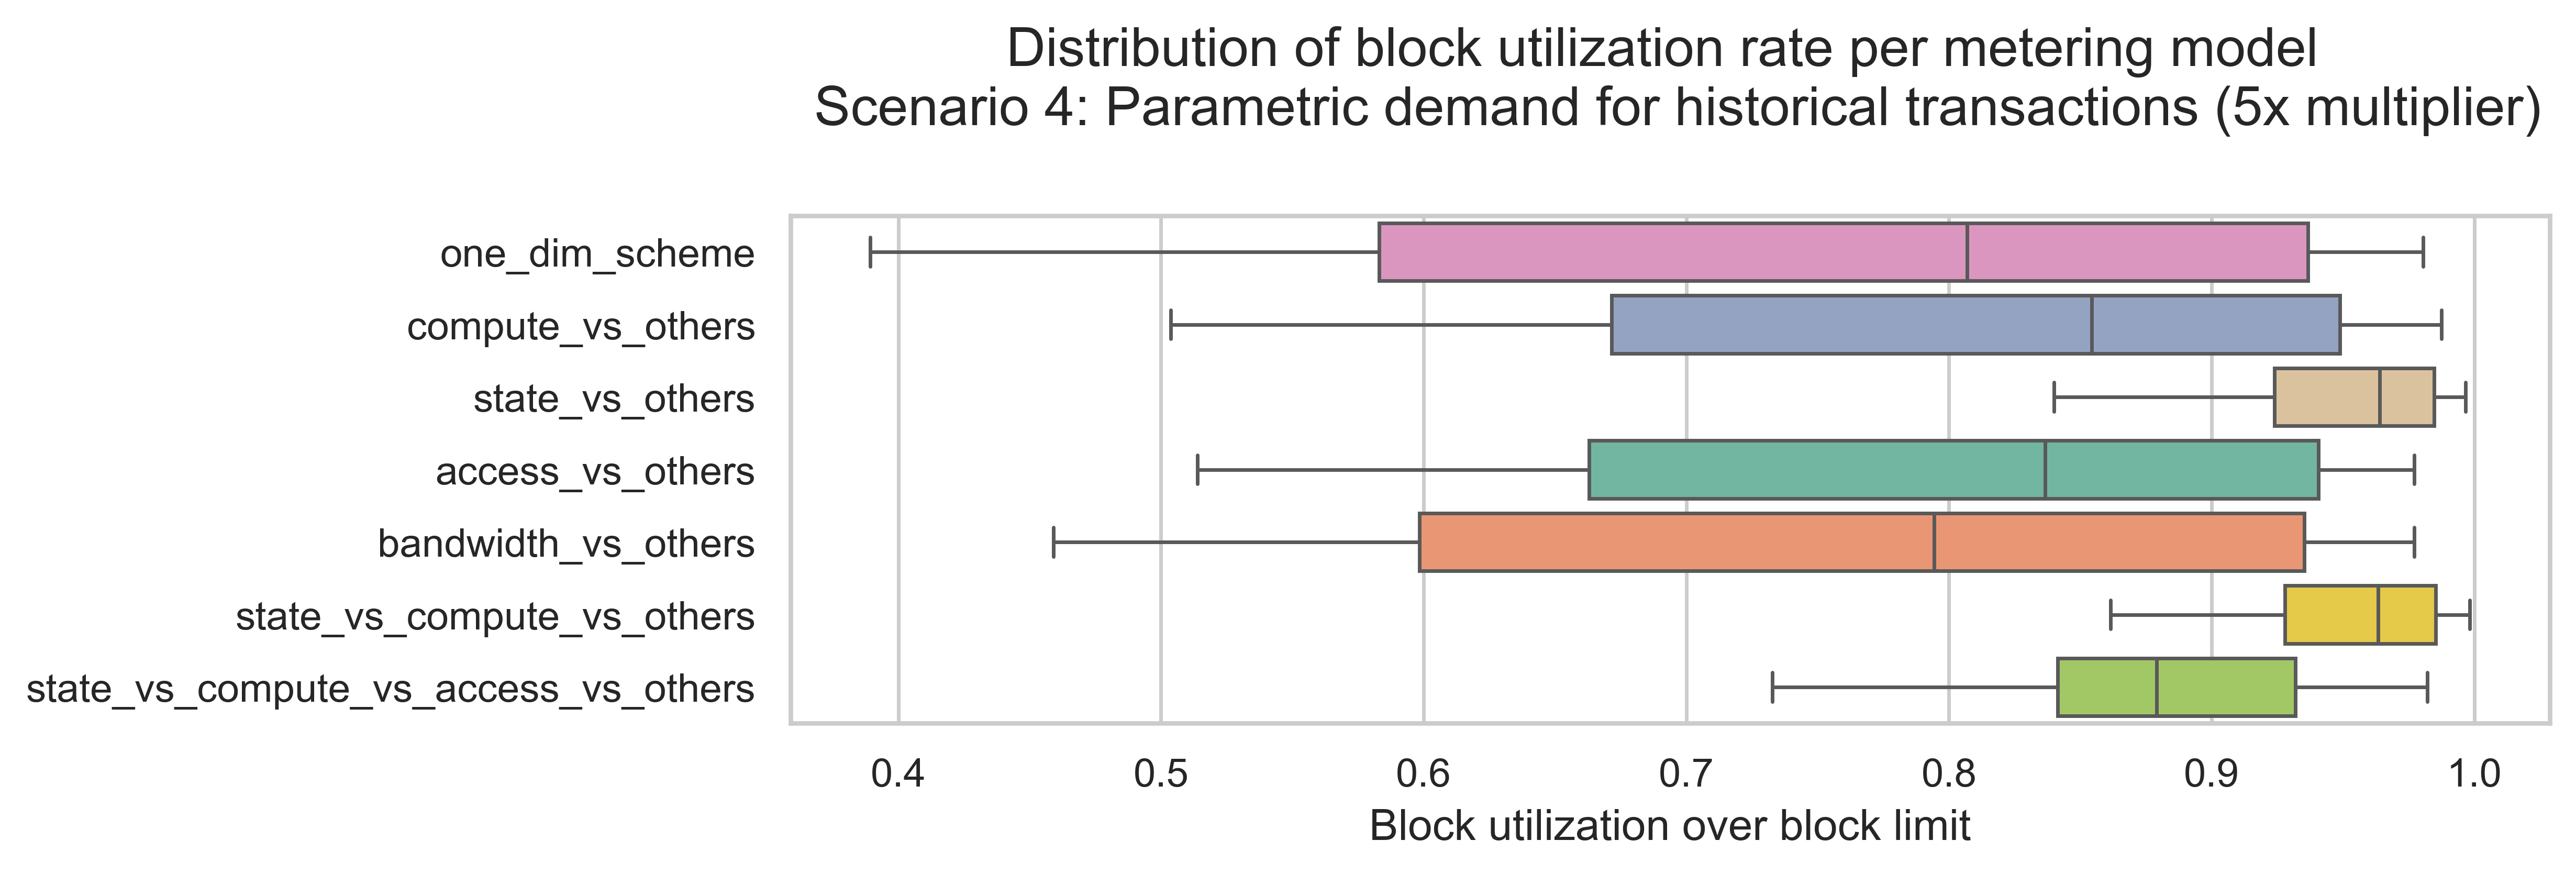

In [21]:
file_name = "historical_txs_sim_results_demand=parametric_mul=5.csv"
scenario_title = "Scenario 4: Parametric demand for historical transactions (5x multiplier)"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_sim_results_df[agg_sim_results_df["file_name"]==file_name],
    x="utilization",
    y="meter_scheme",
    hue="meter_scheme",
    legend=False,
    order=meter_order,
)
plt.xlabel("Block utilization over block limit")
plt.ylabel("")
plt.title(
    f"Distribution of block utilization rate per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

## 4. Throughput by metering

In [22]:
file_name = "eth_transfer_sim_results.csv"
scenario_title = "Scenario 1: Infinite demand for ETH transfers"

sim_results_df[sim_results_df["file_name"]==file_name][["meter_scheme", "limit", "throughput"]]

meter_scheme       limit  throughput
70000                        one_dim_scheme  36000000.0        1714
70001                        one_dim_scheme  18000000.0         857
70002                     compute_vs_others  36000000.0        2880
70003                     compute_vs_others  18000000.0        1440
70004                       state_vs_others  36000000.0        1714
70005                       state_vs_others  18000000.0         857
70006                      access_vs_others  36000000.0        1739
70007                      access_vs_others  18000000.0         869
70008                   bandwidth_vs_others  36000000.0        2352
70009                   bandwidth_vs_others  18000000.0        1176
70010            state_vs_compute_vs_others  36000000.0        2880
70011            state_vs_compute_vs_others  18000000.0        1440
70012  state_vs_compute_vs_access_vs_others  36000000.0        2950
70013  state_vs_compute_vs_access_vs_others  18000000.0        1475

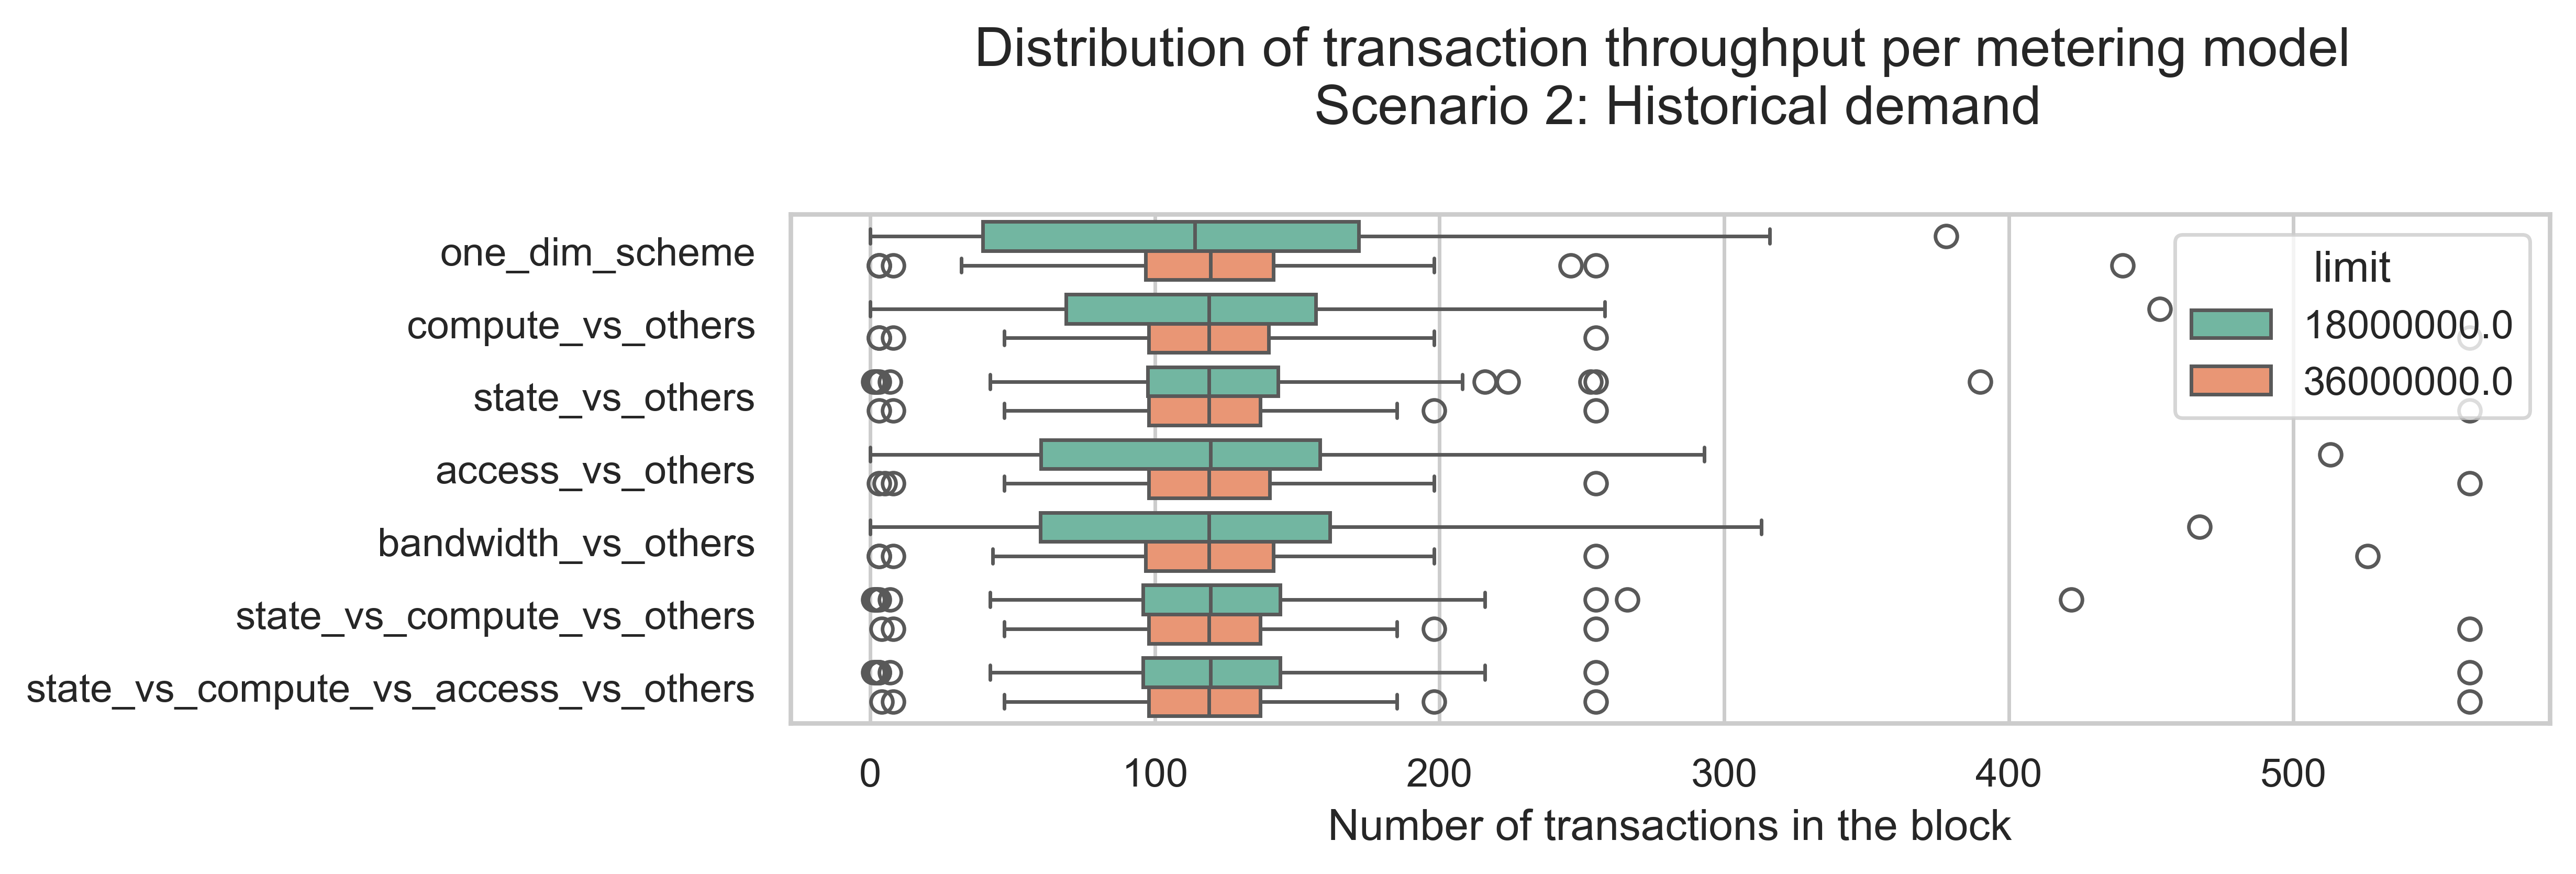

In [26]:
file_name = "historical_txs_sim_results_demand=historical_mul=None.csv"
scenario_title = "Scenario 2: Historical demand"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_sim_results_df[agg_sim_results_df["file_name"]==file_name],
    x="throughput",
    y="meter_scheme",
    hue="limit",
    palette="Set2",
    order=meter_order,
)
plt.xlabel("Number of transactions in the block")
plt.ylabel("")
plt.title(
    f"Distribution of transaction throughput per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

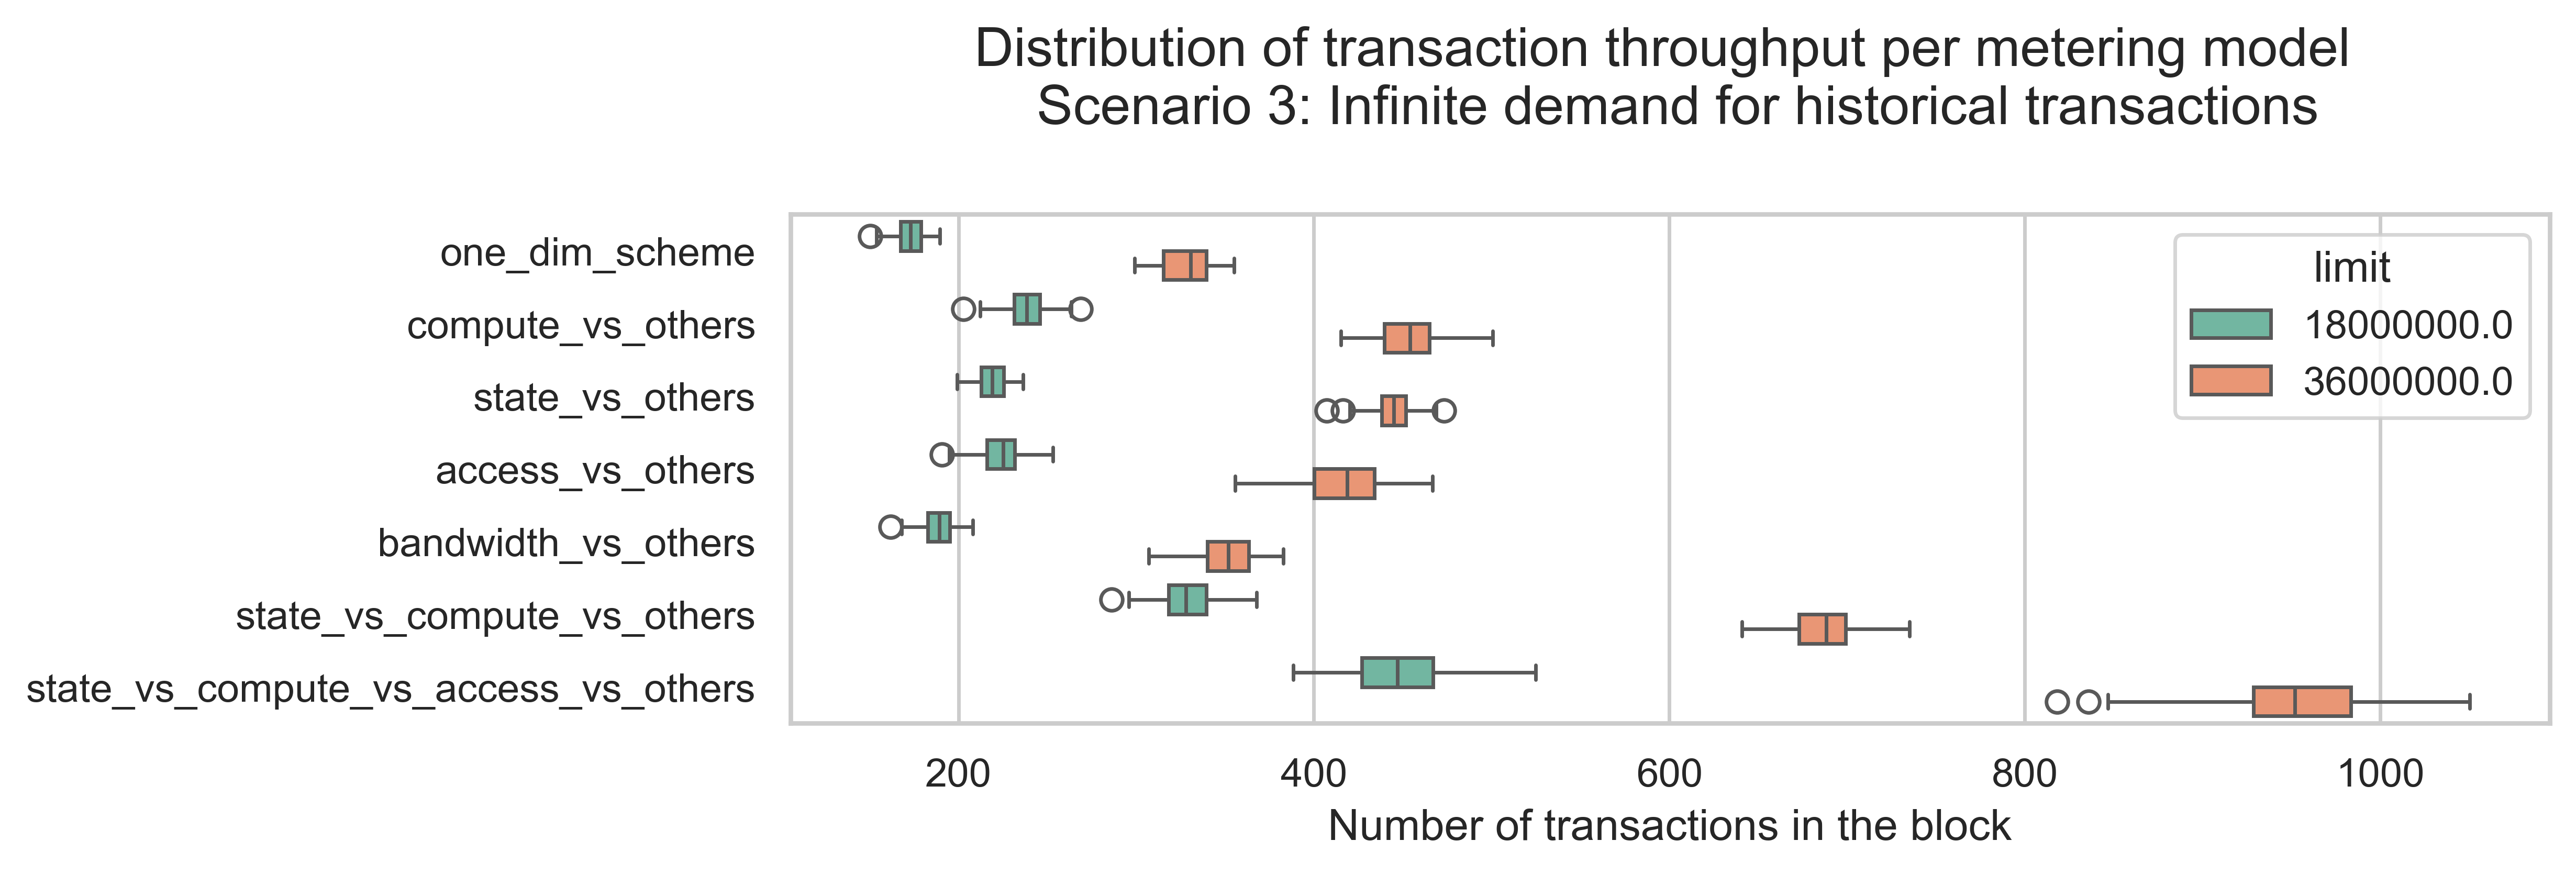

In [27]:
file_name = "historical_txs_sim_results_demand=infinite_mul=None.csv"
scenario_title = "Scenario 3: Infinite demand for historical transactions"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_sim_results_df[agg_sim_results_df["file_name"]==file_name],
    x="throughput",
    y="meter_scheme",
    hue="limit",
    palette="Set2",
    order=meter_order,
)
plt.xlabel("Number of transactions in the block")
plt.ylabel("")
plt.title(
    f"Distribution of transaction throughput per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

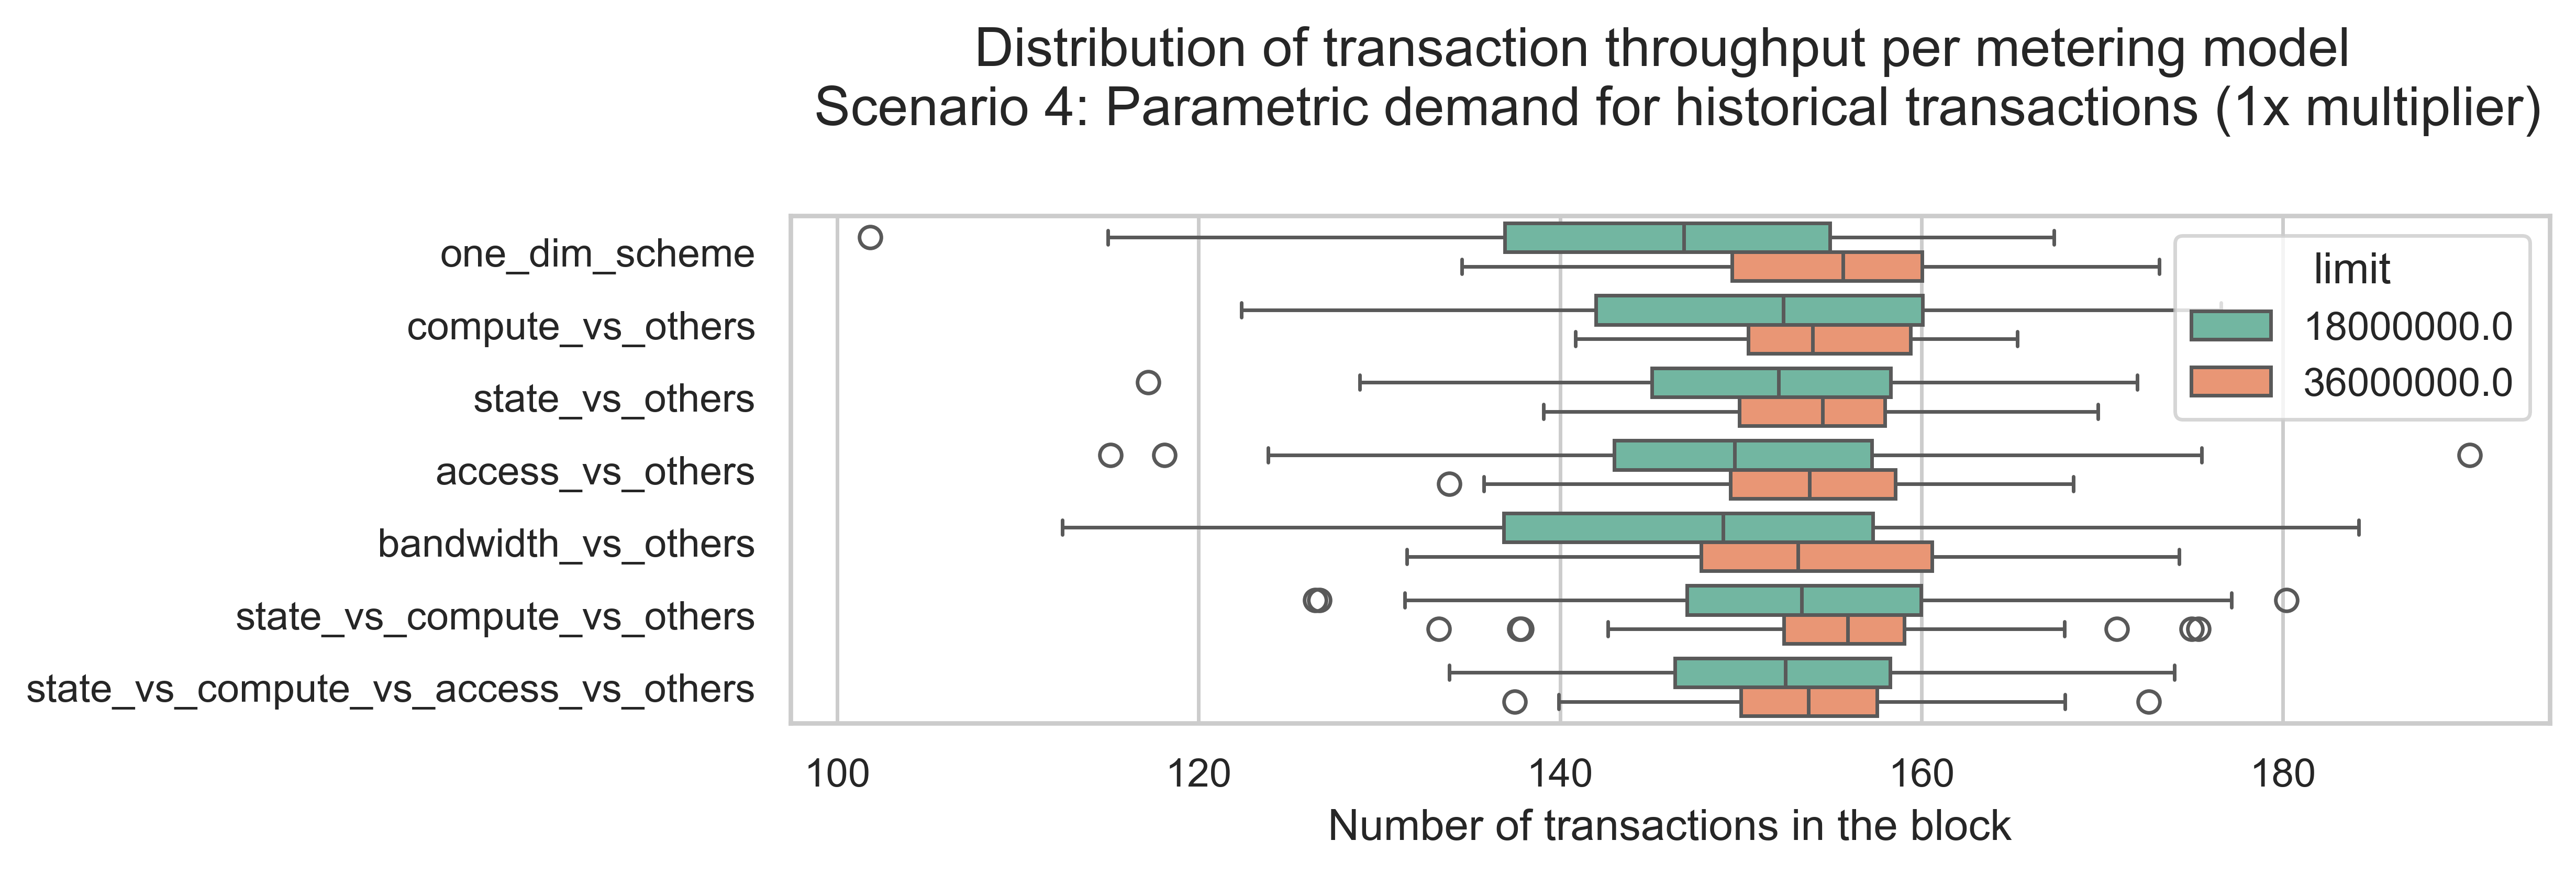

In [28]:
file_name = "historical_txs_sim_results_demand=parametric_mul=1.csv"
scenario_title = "Scenario 4: Parametric demand for historical transactions (1x multiplier)"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_sim_results_df[agg_sim_results_df["file_name"]==file_name],
    x="throughput",
    y="meter_scheme",
    hue="limit",
    palette="Set2",
    order=meter_order,
)
plt.xlabel("Number of transactions in the block")
plt.ylabel("")
plt.title(
    f"Distribution of transaction throughput per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

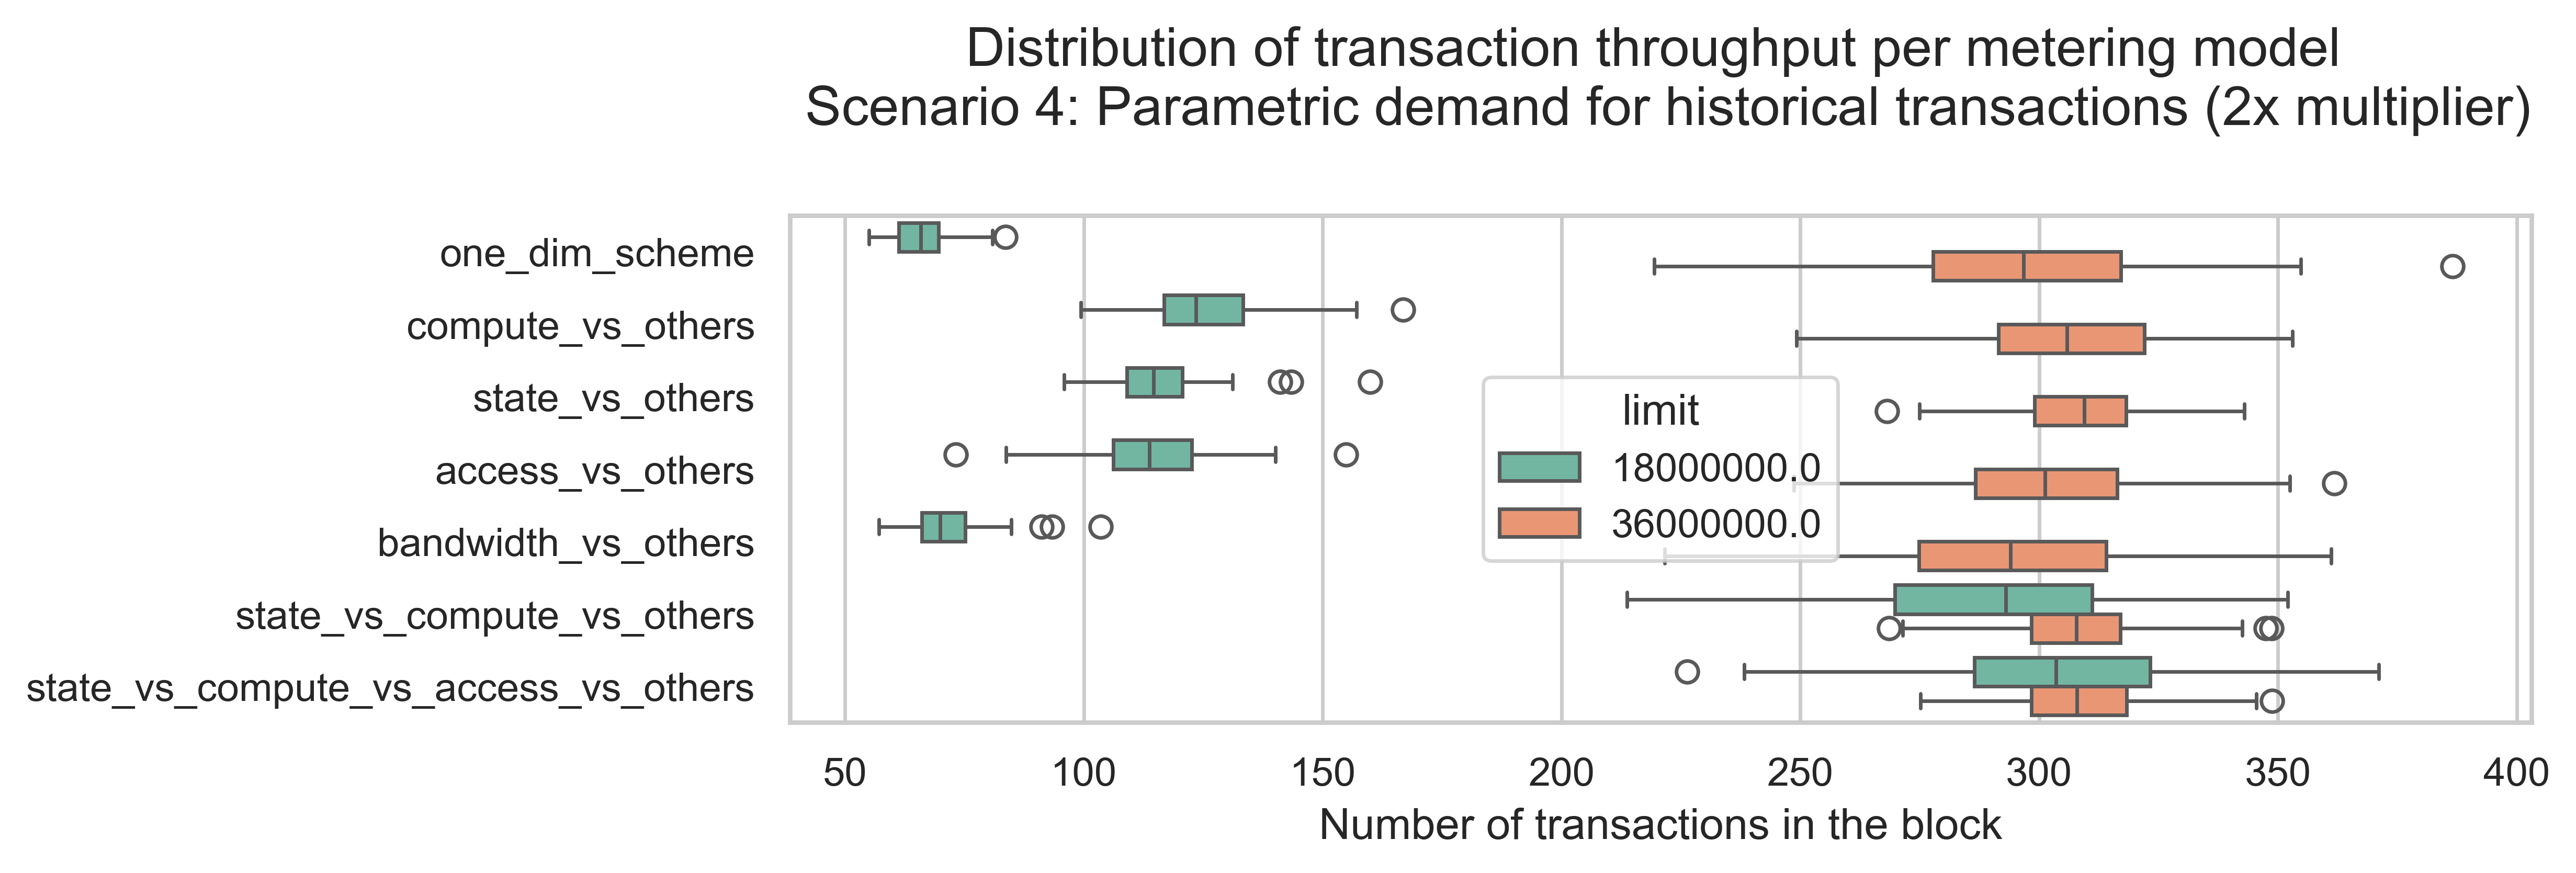

In [29]:
file_name = "historical_txs_sim_results_demand=parametric_mul=2.csv"
scenario_title = "Scenario 4: Parametric demand for historical transactions (2x multiplier)"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_sim_results_df[agg_sim_results_df["file_name"]==file_name],
    x="throughput",
    y="meter_scheme",
    hue="limit",
    palette="Set2",
    order=meter_order,
)
plt.xlabel("Number of transactions in the block")
plt.ylabel("")
plt.title(
    f"Distribution of transaction throughput per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

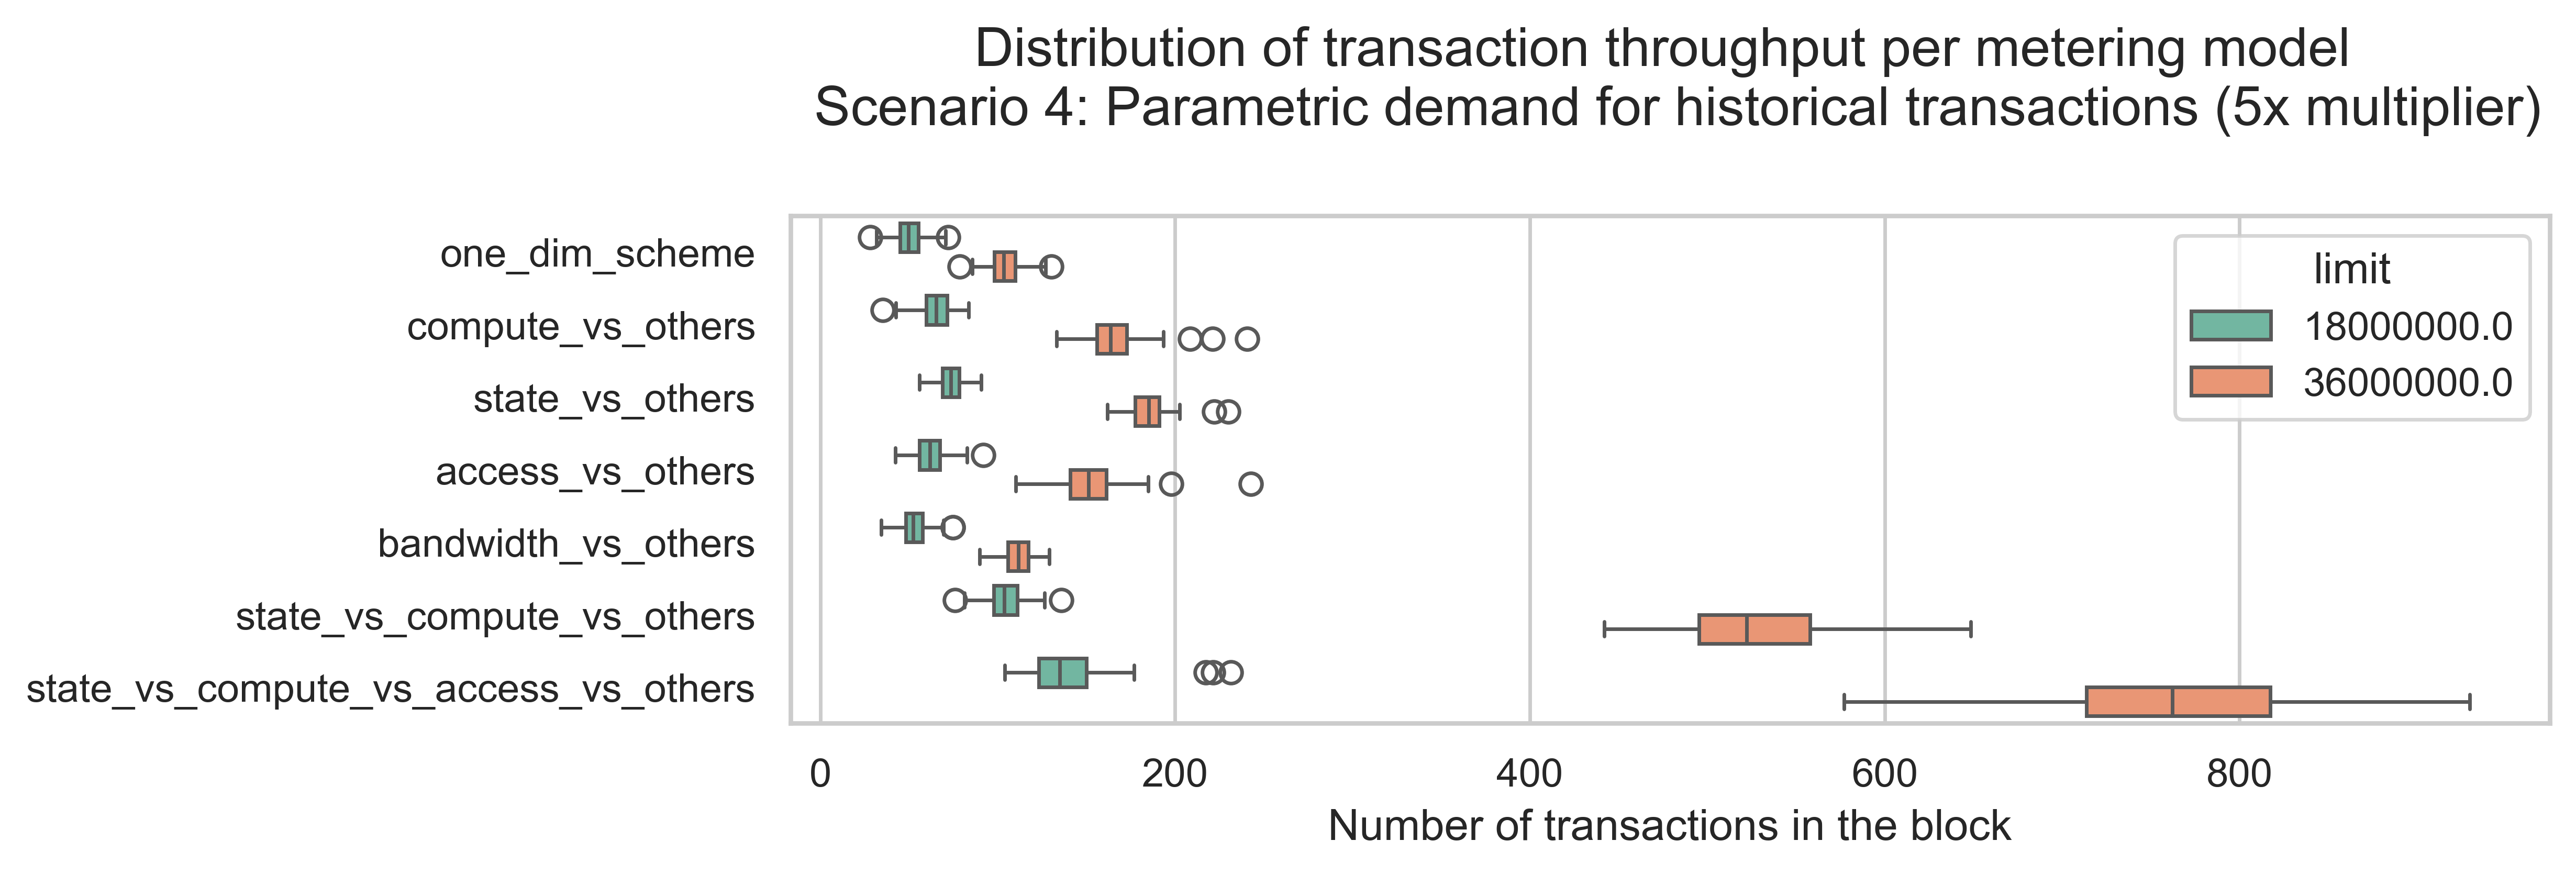

In [30]:
file_name = "historical_txs_sim_results_demand=parametric_mul=5.csv"
scenario_title = "Scenario 4: Parametric demand for historical transactions (5x multiplier)"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_sim_results_df[agg_sim_results_df["file_name"]==file_name],
    x="throughput",
    y="meter_scheme",
    hue="limit",
    palette="Set2",
    order=meter_order,
)
plt.xlabel("Number of transactions in the block")
plt.ylabel("")
plt.title(
    f"Distribution of transaction throughput per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

## 5. One-dimensional utilization by metering (limit = 36k)

In [32]:
file_name = "eth_transfer_sim_results.csv"
scenario_title = "Scenario 1: Infinite demand for ETH transfers"

sim_results_df[sim_results_df["file_name"]==file_name][["meter_scheme", "limit", "one_dim_utilization"]]

meter_scheme       limit  one_dim_utilization
70000                        one_dim_scheme  36000000.0             0.999833
70001                        one_dim_scheme  18000000.0             0.999833
70002                     compute_vs_others  36000000.0             1.680000
70003                     compute_vs_others  18000000.0             1.680000
70004                       state_vs_others  36000000.0             0.999833
70005                       state_vs_others  18000000.0             0.999833
70006                      access_vs_others  36000000.0             1.014417
70007                      access_vs_others  18000000.0             1.013833
70008                   bandwidth_vs_others  36000000.0             1.372000
70009                   bandwidth_vs_others  18000000.0             1.372000
70010            state_vs_compute_vs_others  36000000.0             1.680000
70011            state_vs_compute_vs_others  18000000.0             1.680000
70012  state_vs_compute_vs_access_vs_others  36000000.0             1.720833
70013  state_vs_compute_vs_access_vs_others  18000000.0             1.720833

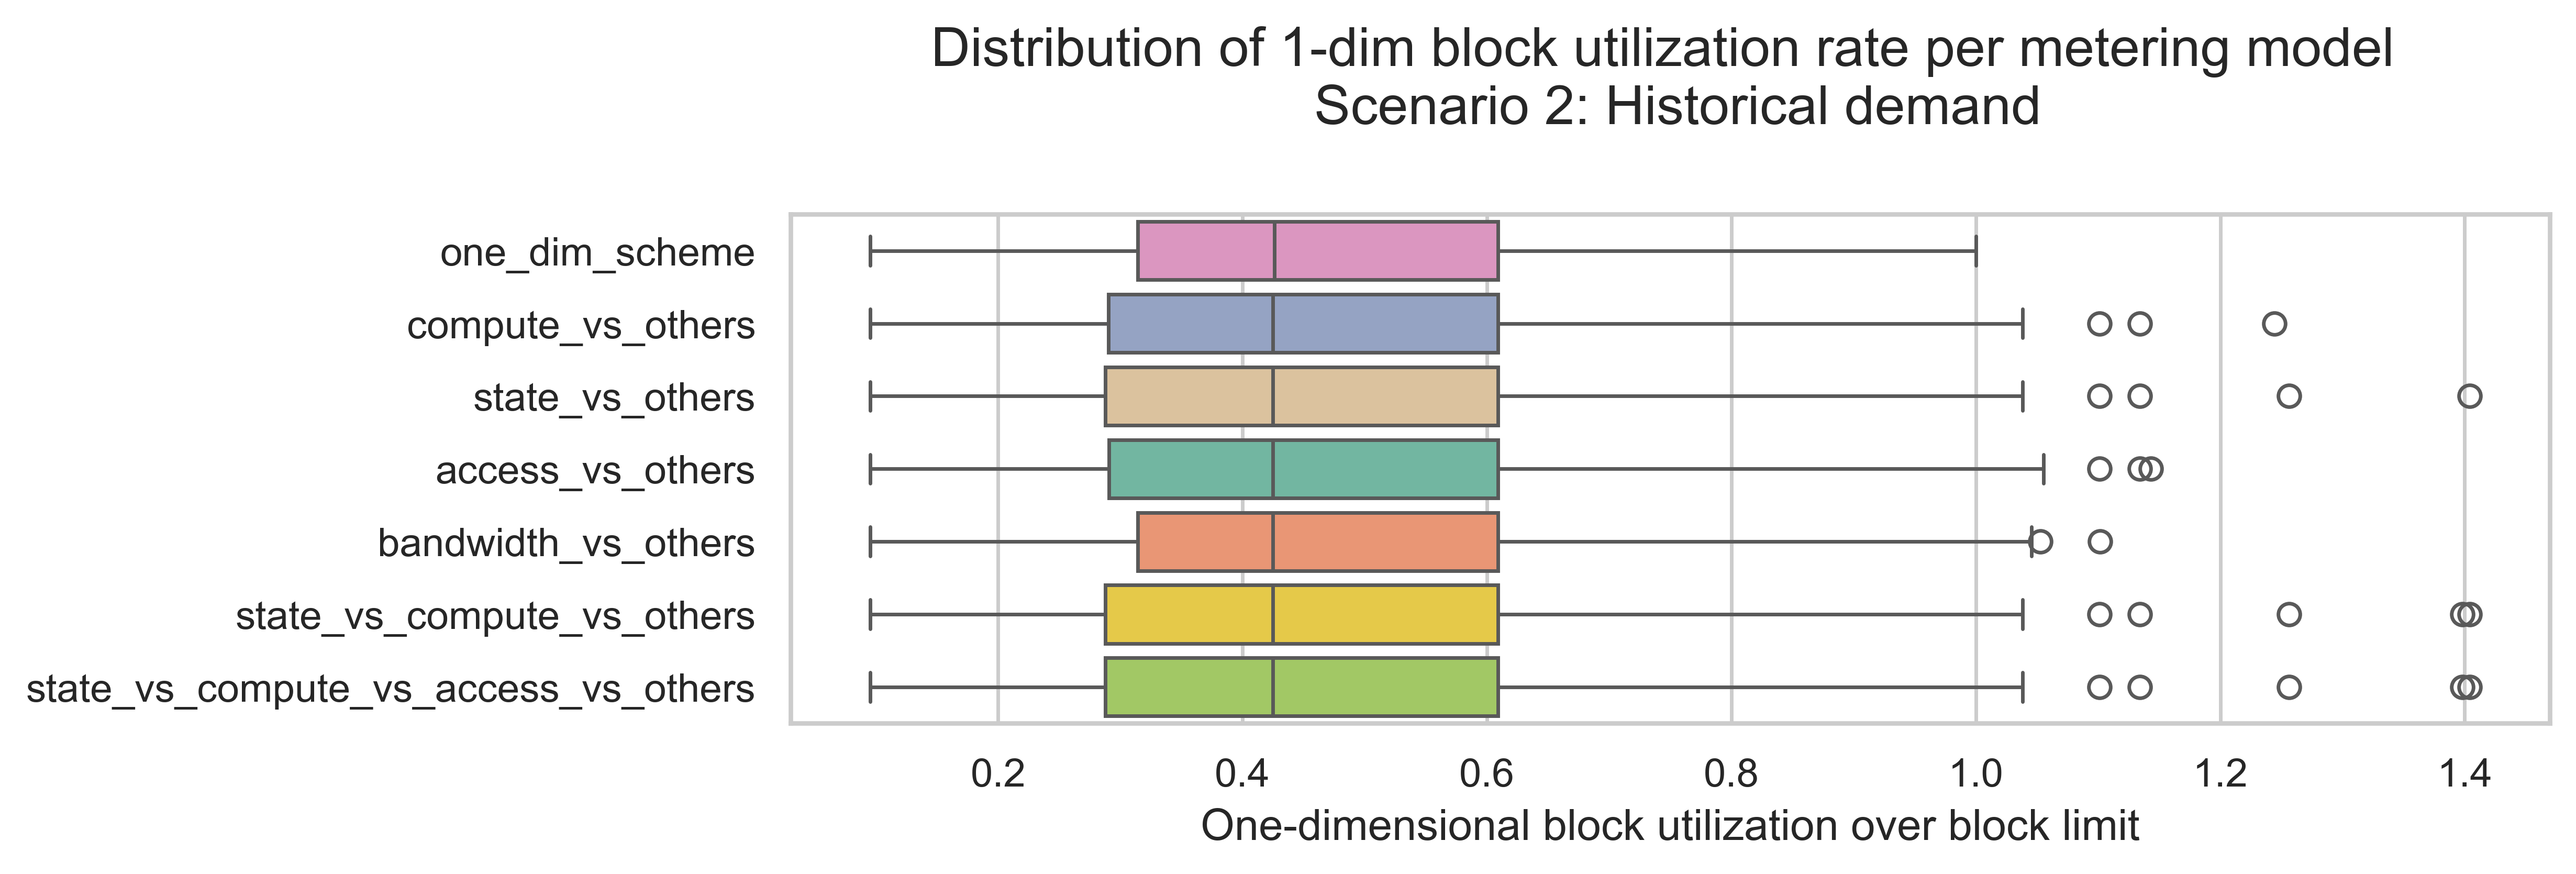

In [33]:
file_name = "historical_txs_sim_results_demand=historical_mul=None.csv"
scenario_title = "Scenario 2: Historical demand"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=limit_agg_sim_results_df[limit_agg_sim_results_df["file_name"]==file_name],
    x="one_dim_utilization",
    y="meter_scheme",
    hue="meter_scheme",
    legend=False,
    order=meter_order,
    
)
plt.xlabel("One-dimensional block utilization over block limit")
plt.ylabel("")
plt.title(
    f"Distribution of 1-dim block utilization rate per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

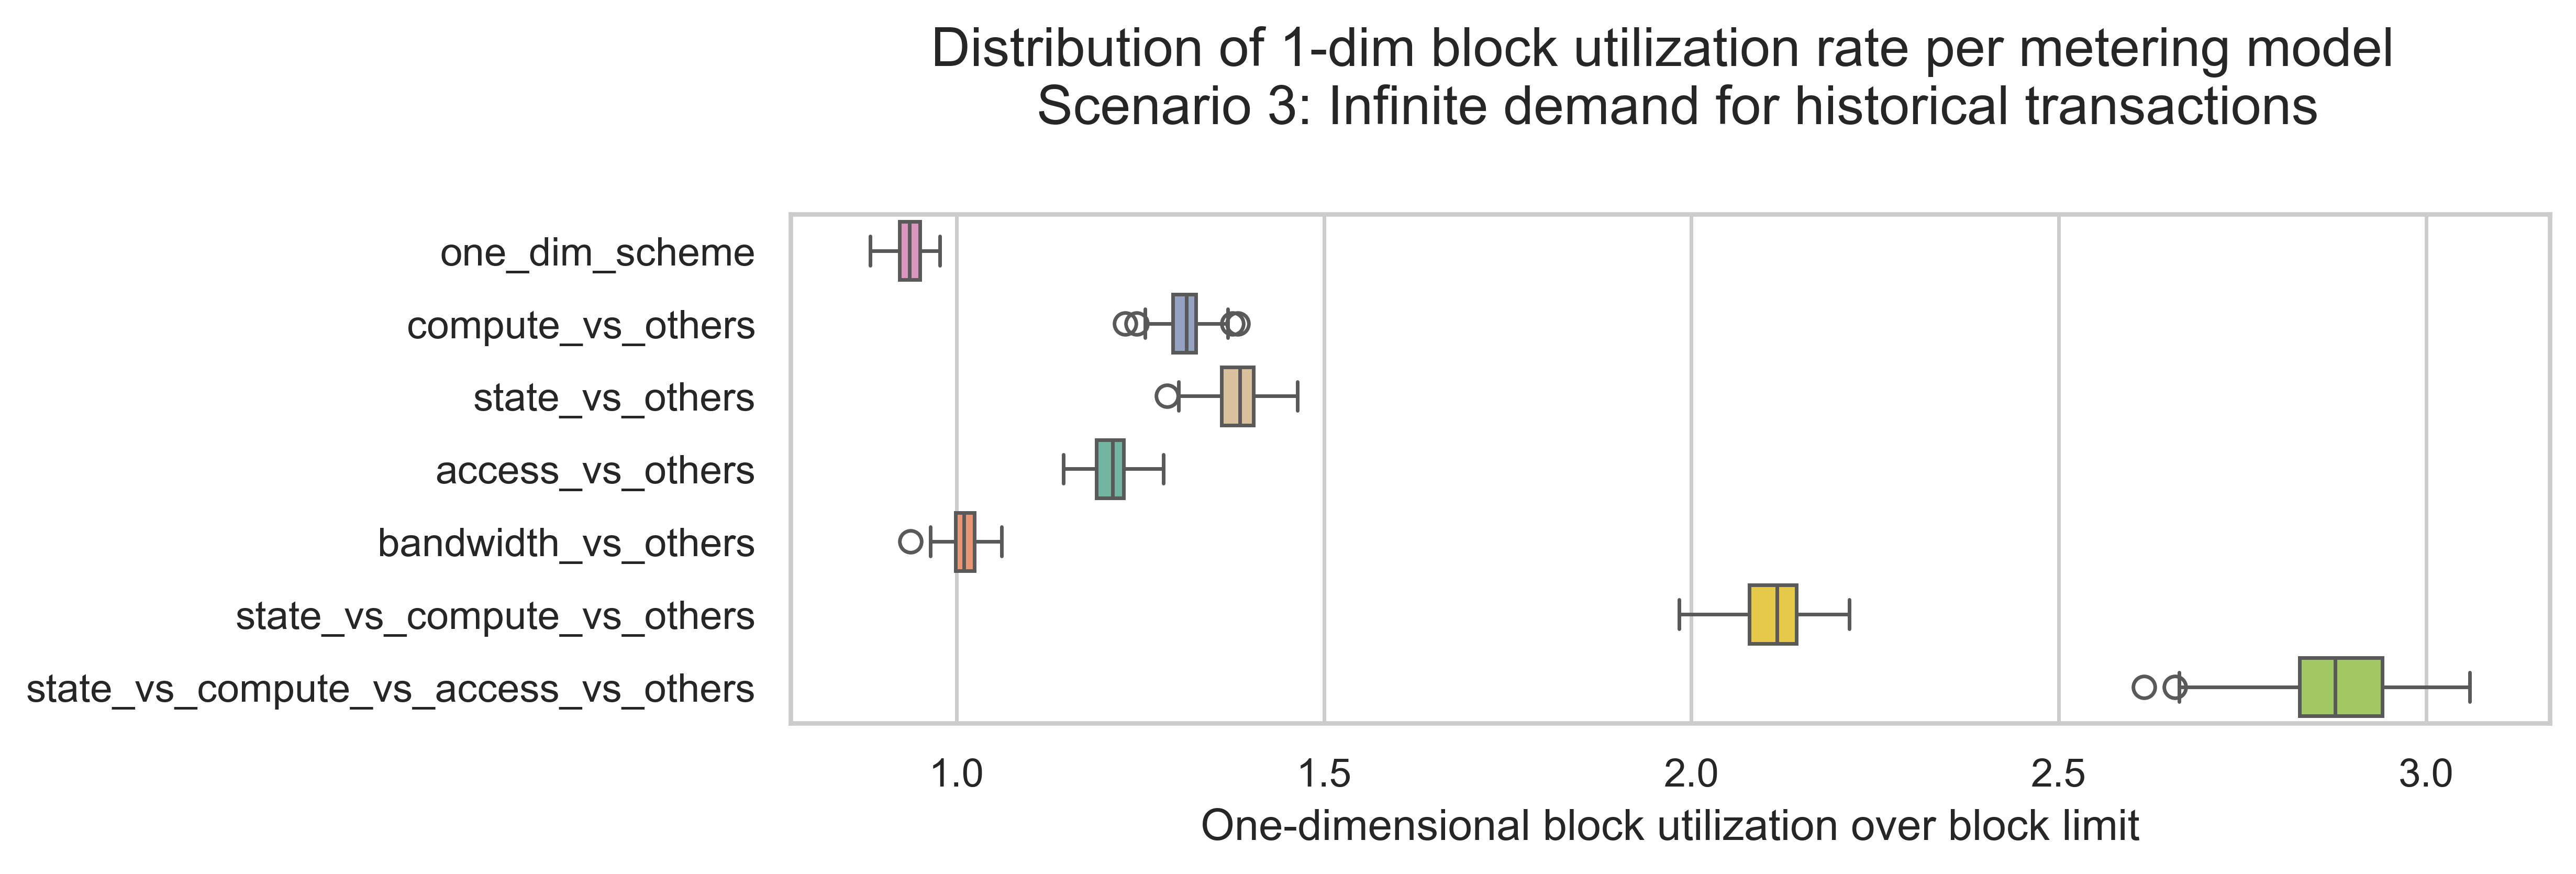

In [34]:
file_name = "historical_txs_sim_results_demand=infinite_mul=None.csv"
scenario_title = "Scenario 3: Infinite demand for historical transactions"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=limit_agg_sim_results_df[limit_agg_sim_results_df["file_name"]==file_name],
    x="one_dim_utilization",
    y="meter_scheme",
    hue="meter_scheme",
    legend=False,
    order=meter_order,
    
)
plt.xlabel("One-dimensional block utilization over block limit")
plt.ylabel("")
plt.title(
    f"Distribution of 1-dim block utilization rate per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

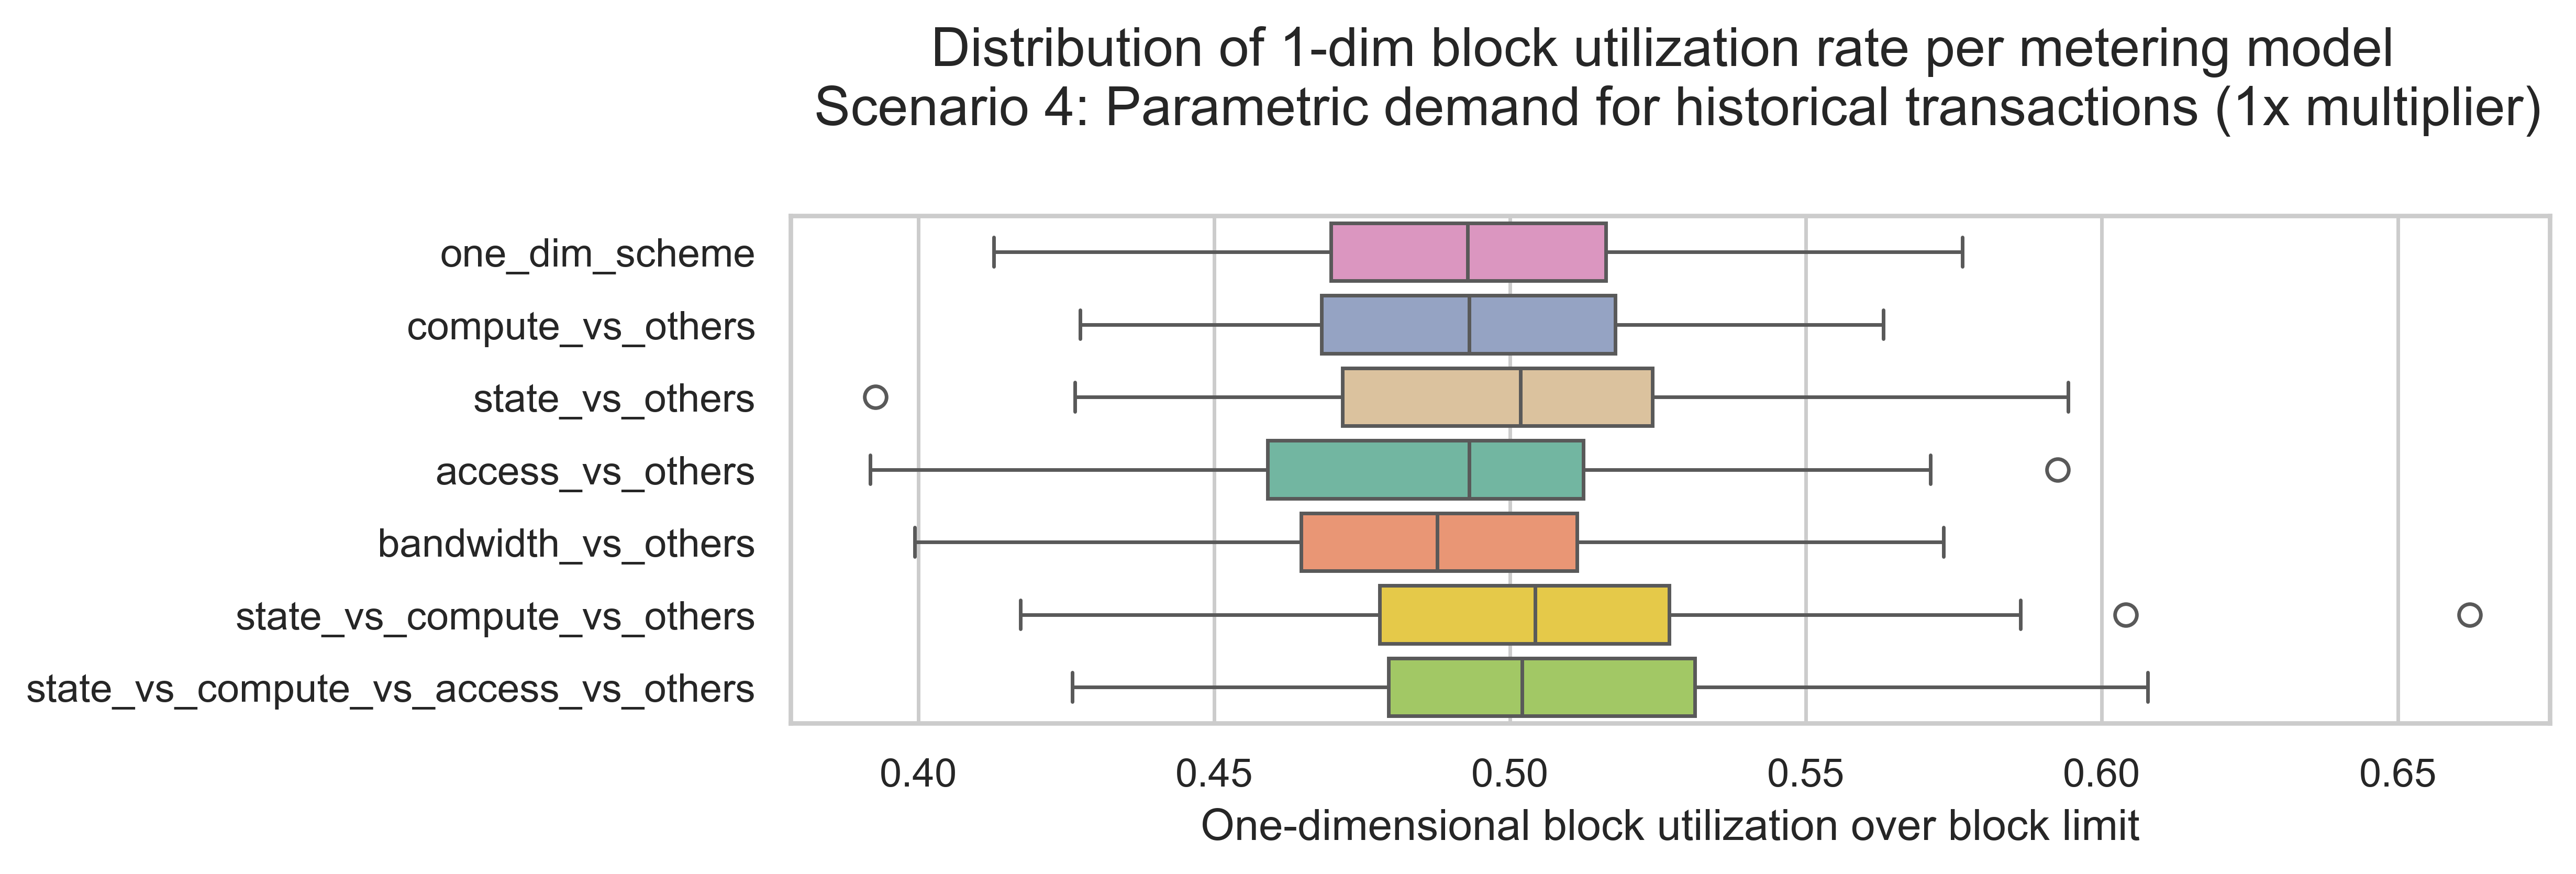

In [35]:
file_name = "historical_txs_sim_results_demand=parametric_mul=1.csv"
scenario_title = "Scenario 4: Parametric demand for historical transactions (1x multiplier)"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=limit_agg_sim_results_df[limit_agg_sim_results_df["file_name"]==file_name],
    x="one_dim_utilization",
    y="meter_scheme",
    hue="meter_scheme",
    legend=False,
    order=meter_order,
    
)
plt.xlabel("One-dimensional block utilization over block limit")
plt.ylabel("")
plt.title(
    f"Distribution of 1-dim block utilization rate per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

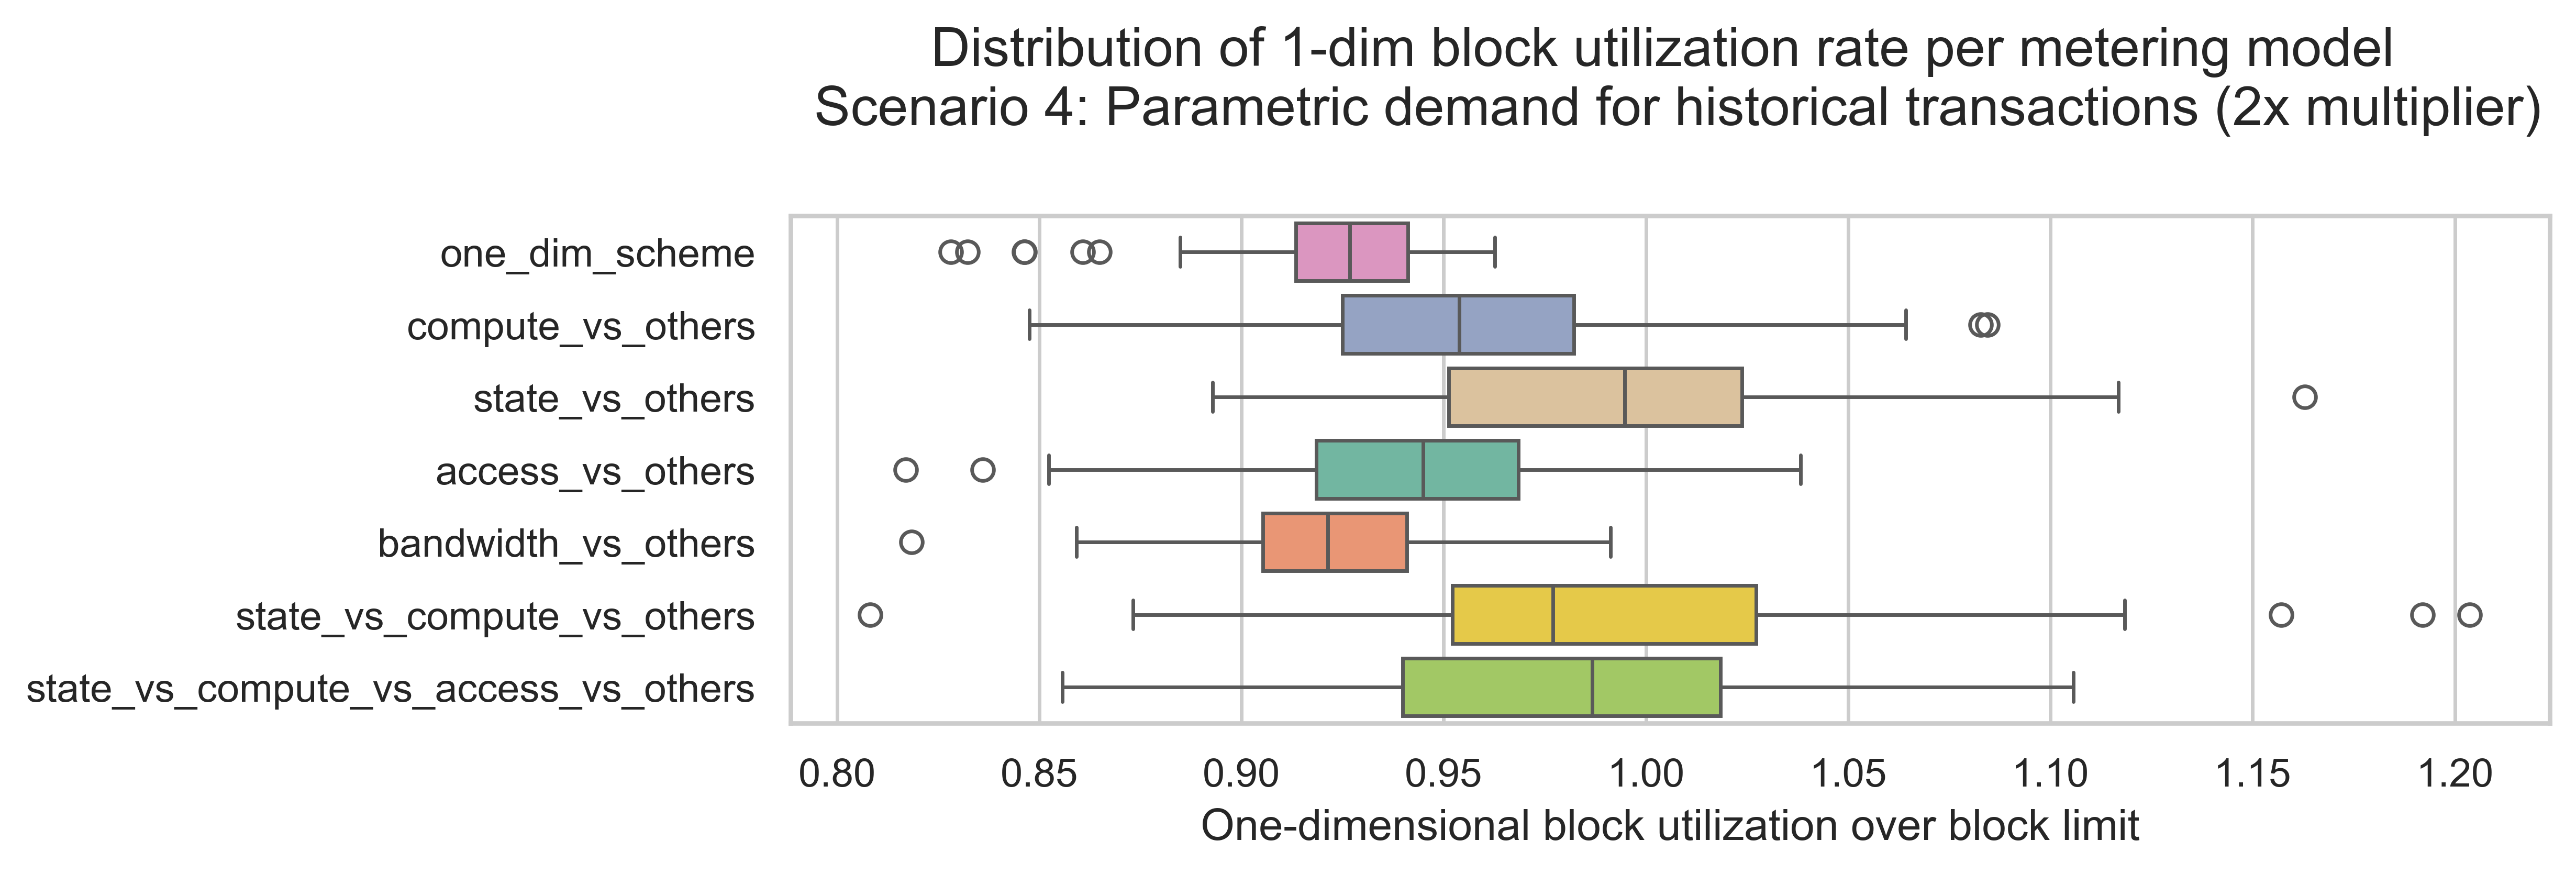

In [36]:
file_name = "historical_txs_sim_results_demand=parametric_mul=2.csv"
scenario_title = "Scenario 4: Parametric demand for historical transactions (2x multiplier)"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=limit_agg_sim_results_df[limit_agg_sim_results_df["file_name"]==file_name],
    x="one_dim_utilization",
    y="meter_scheme",
    hue="meter_scheme",
    legend=False,
    order=meter_order,
    
)
plt.xlabel("One-dimensional block utilization over block limit")
plt.ylabel("")
plt.title(
    f"Distribution of 1-dim block utilization rate per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

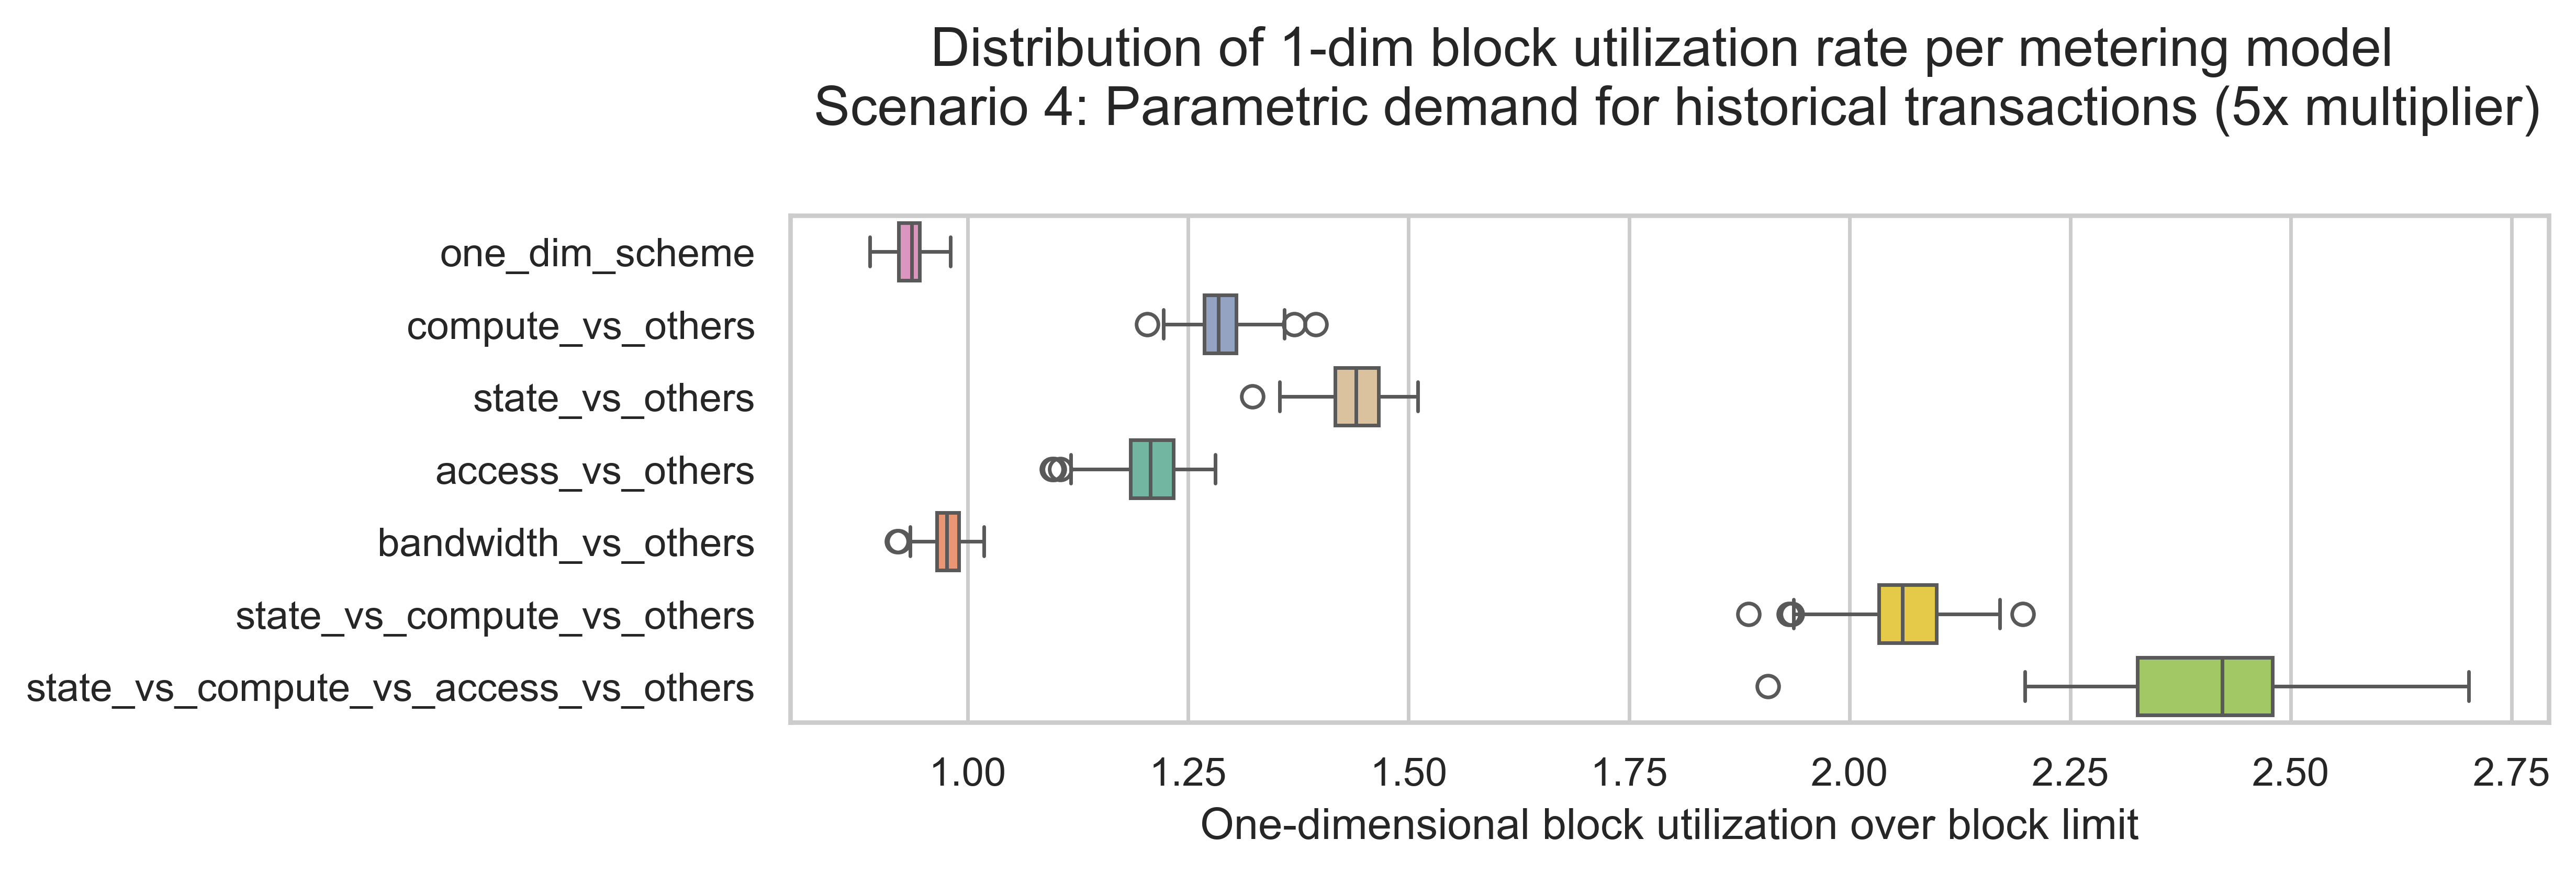

In [37]:
file_name = "historical_txs_sim_results_demand=parametric_mul=5.csv"
scenario_title = "Scenario 4: Parametric demand for historical transactions (5x multiplier)"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=limit_agg_sim_results_df[limit_agg_sim_results_df["file_name"]==file_name],
    x="one_dim_utilization",
    y="meter_scheme",
    hue="meter_scheme",
    legend=False,
    order=meter_order,
    
)
plt.xlabel("One-dimensional block utilization over block limit")
plt.ylabel("")
plt.title(
    f"Distribution of 1-dim block utilization rate per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

## 6. Gas used by metering (limit = 36k)

In [38]:
file_name = "eth_transfer_sim_results.csv"
scenario_title = "Scenario 1: Infinite demand for ETH transfers"

sim_results_df[sim_results_df["file_name"]==file_name][["meter_scheme", "limit", "gas_used_million"]]

meter_scheme       limit  gas_used_million
70000                        one_dim_scheme  36000000.0            35.994
70001                        one_dim_scheme  18000000.0            17.997
70002                     compute_vs_others  36000000.0            60.480
70003                     compute_vs_others  18000000.0            30.240
70004                       state_vs_others  36000000.0            35.994
70005                       state_vs_others  18000000.0            17.997
70006                      access_vs_others  36000000.0            36.519
70007                      access_vs_others  18000000.0            18.249
70008                   bandwidth_vs_others  36000000.0            49.392
70009                   bandwidth_vs_others  18000000.0            24.696
70010            state_vs_compute_vs_others  36000000.0            60.480
70011            state_vs_compute_vs_others  18000000.0            30.240
70012  state_vs_compute_vs_access_vs_others  36000000.0            61.950
70013  state_vs_compute_vs_access_vs_others  18000000.0            30.975

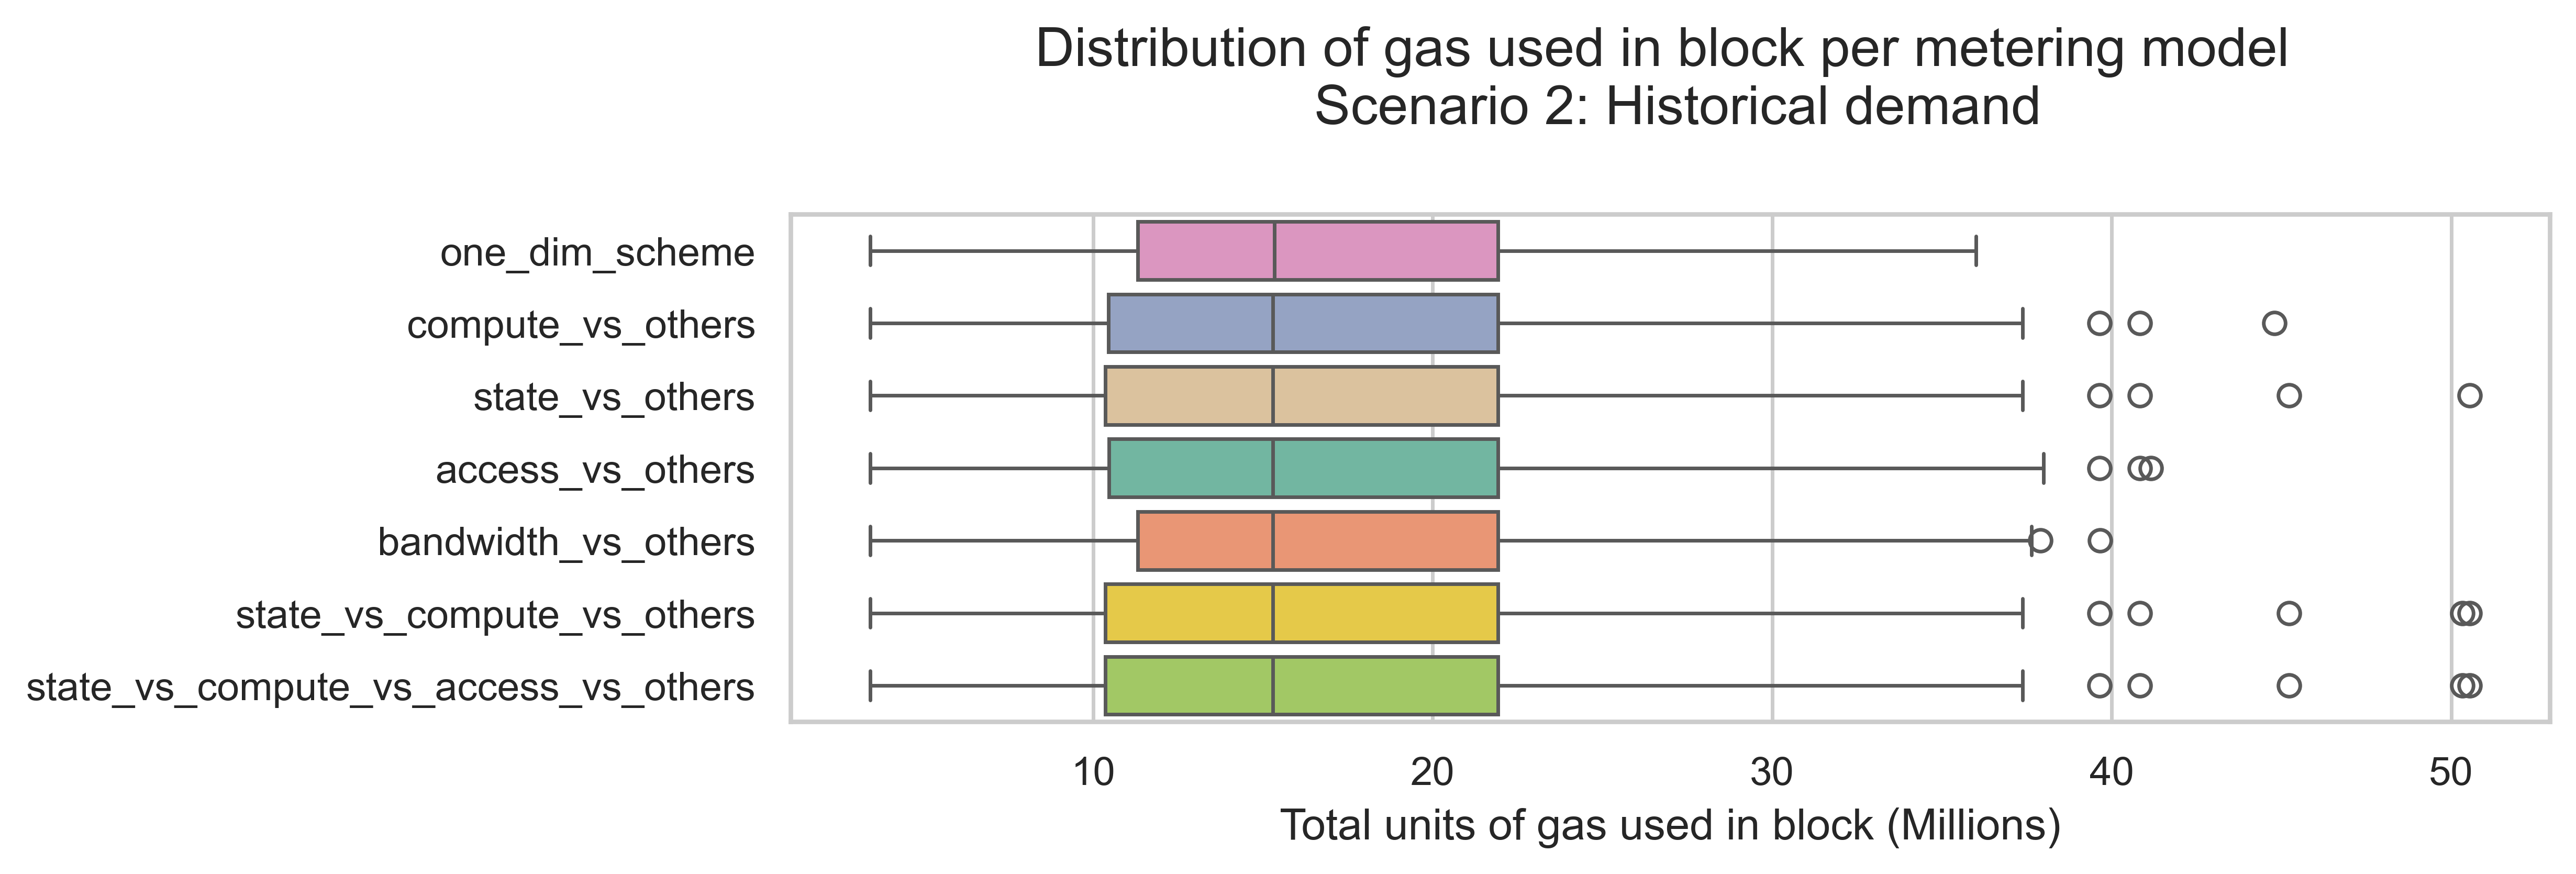

In [41]:
file_name = "historical_txs_sim_results_demand=historical_mul=None.csv"
scenario_title = "Scenario 2: Historical demand"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=limit_agg_sim_results_df[limit_agg_sim_results_df["file_name"]==file_name],
    x="gas_used_million",
    y="meter_scheme",
    hue="meter_scheme",
    order=meter_order,
    legend=False
)
plt.xlabel("Total units of gas used in block (Millions)")
plt.ylabel("")
plt.title(
    f"Distribution of gas used in block per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

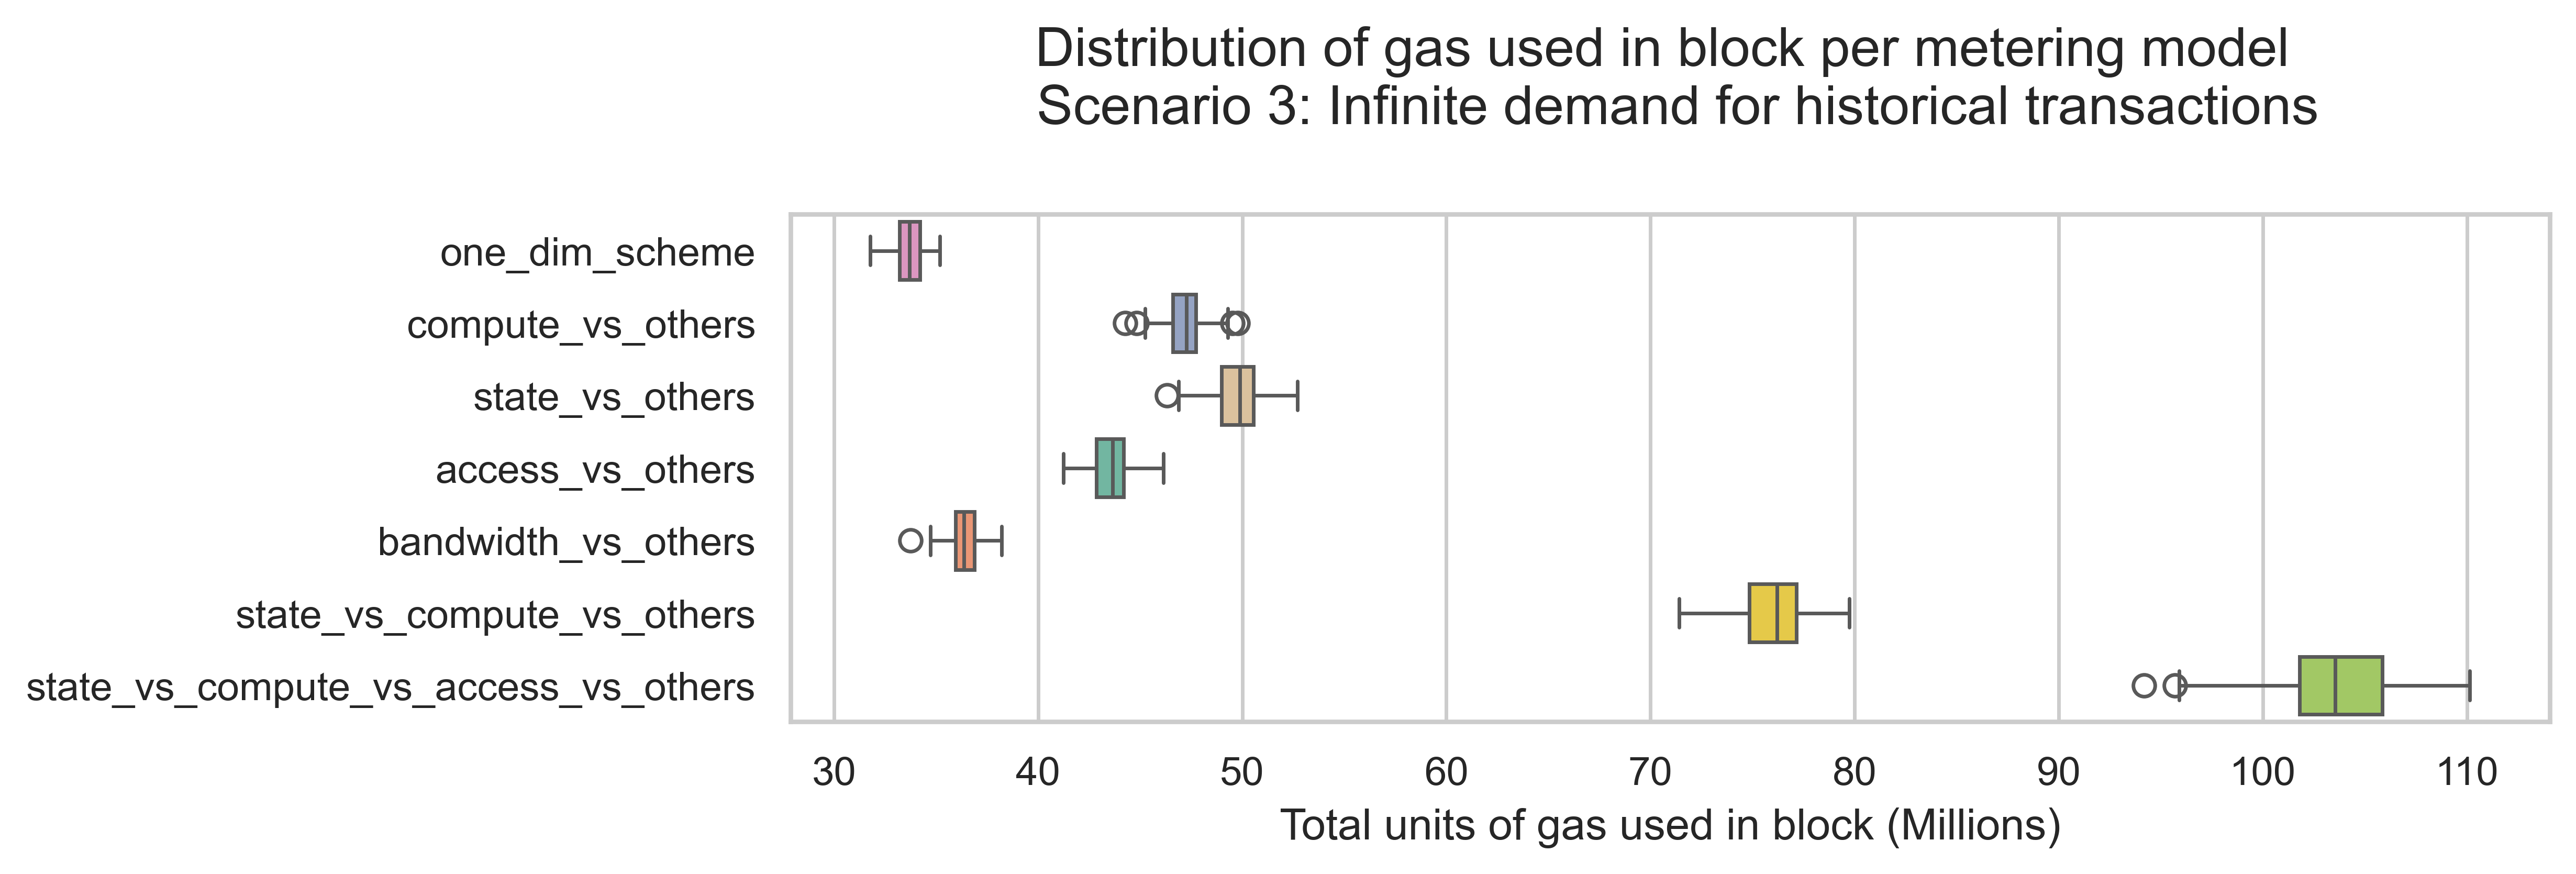

In [42]:
file_name = "historical_txs_sim_results_demand=infinite_mul=None.csv"
scenario_title = "Scenario 3: Infinite demand for historical transactions"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=limit_agg_sim_results_df[limit_agg_sim_results_df["file_name"]==file_name],
    x="gas_used_million",
    y="meter_scheme",
    hue="meter_scheme",
    order=meter_order,
    legend=False
)
plt.xlabel("Total units of gas used in block (Millions)")
plt.ylabel("")
plt.title(
    f"Distribution of gas used in block per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

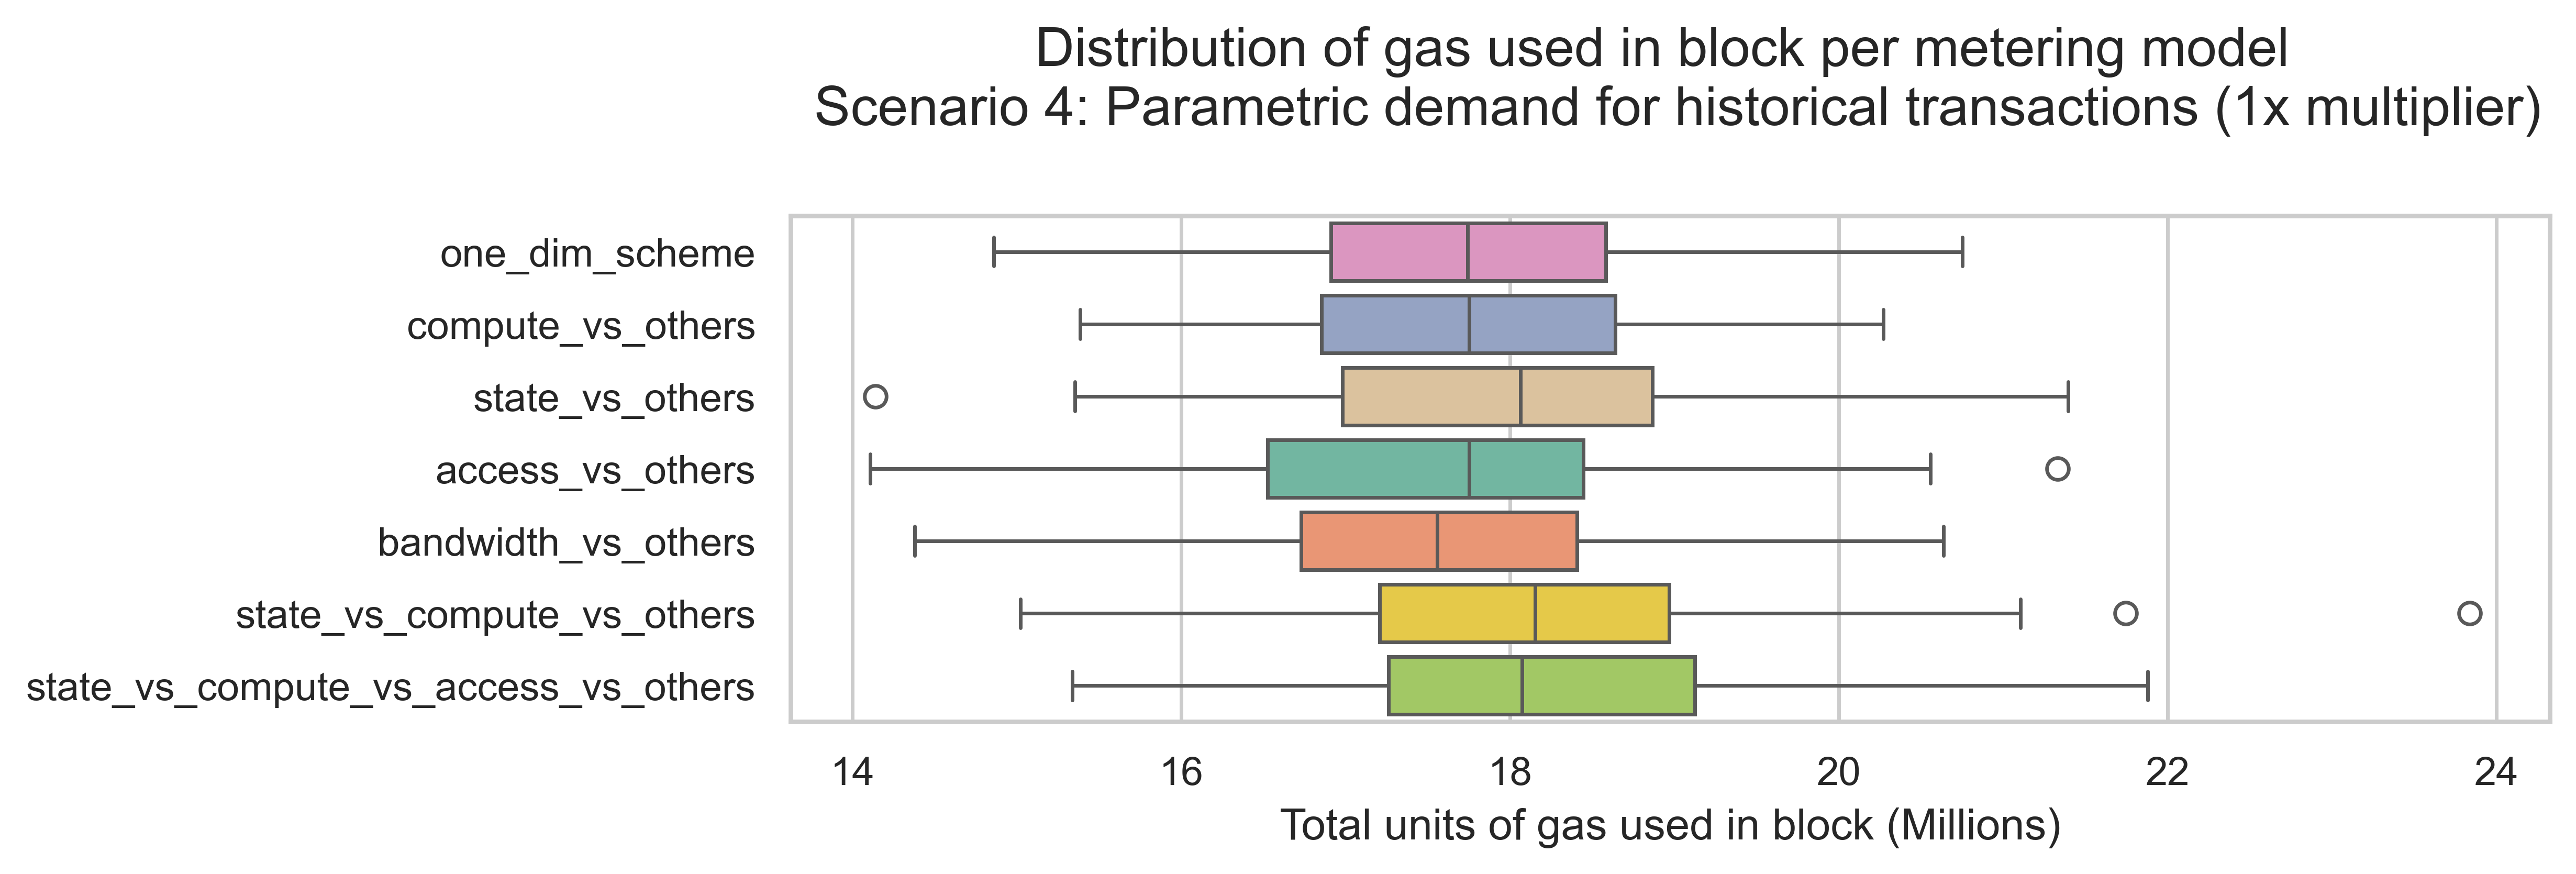

In [43]:
file_name = "historical_txs_sim_results_demand=parametric_mul=1.csv"
scenario_title = "Scenario 4: Parametric demand for historical transactions (1x multiplier)"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=limit_agg_sim_results_df[limit_agg_sim_results_df["file_name"]==file_name],
    x="gas_used_million",
    y="meter_scheme",
    hue="meter_scheme",
    order=meter_order,
    legend=False
)
plt.xlabel("Total units of gas used in block (Millions)")
plt.ylabel("")
plt.title(
    f"Distribution of gas used in block per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

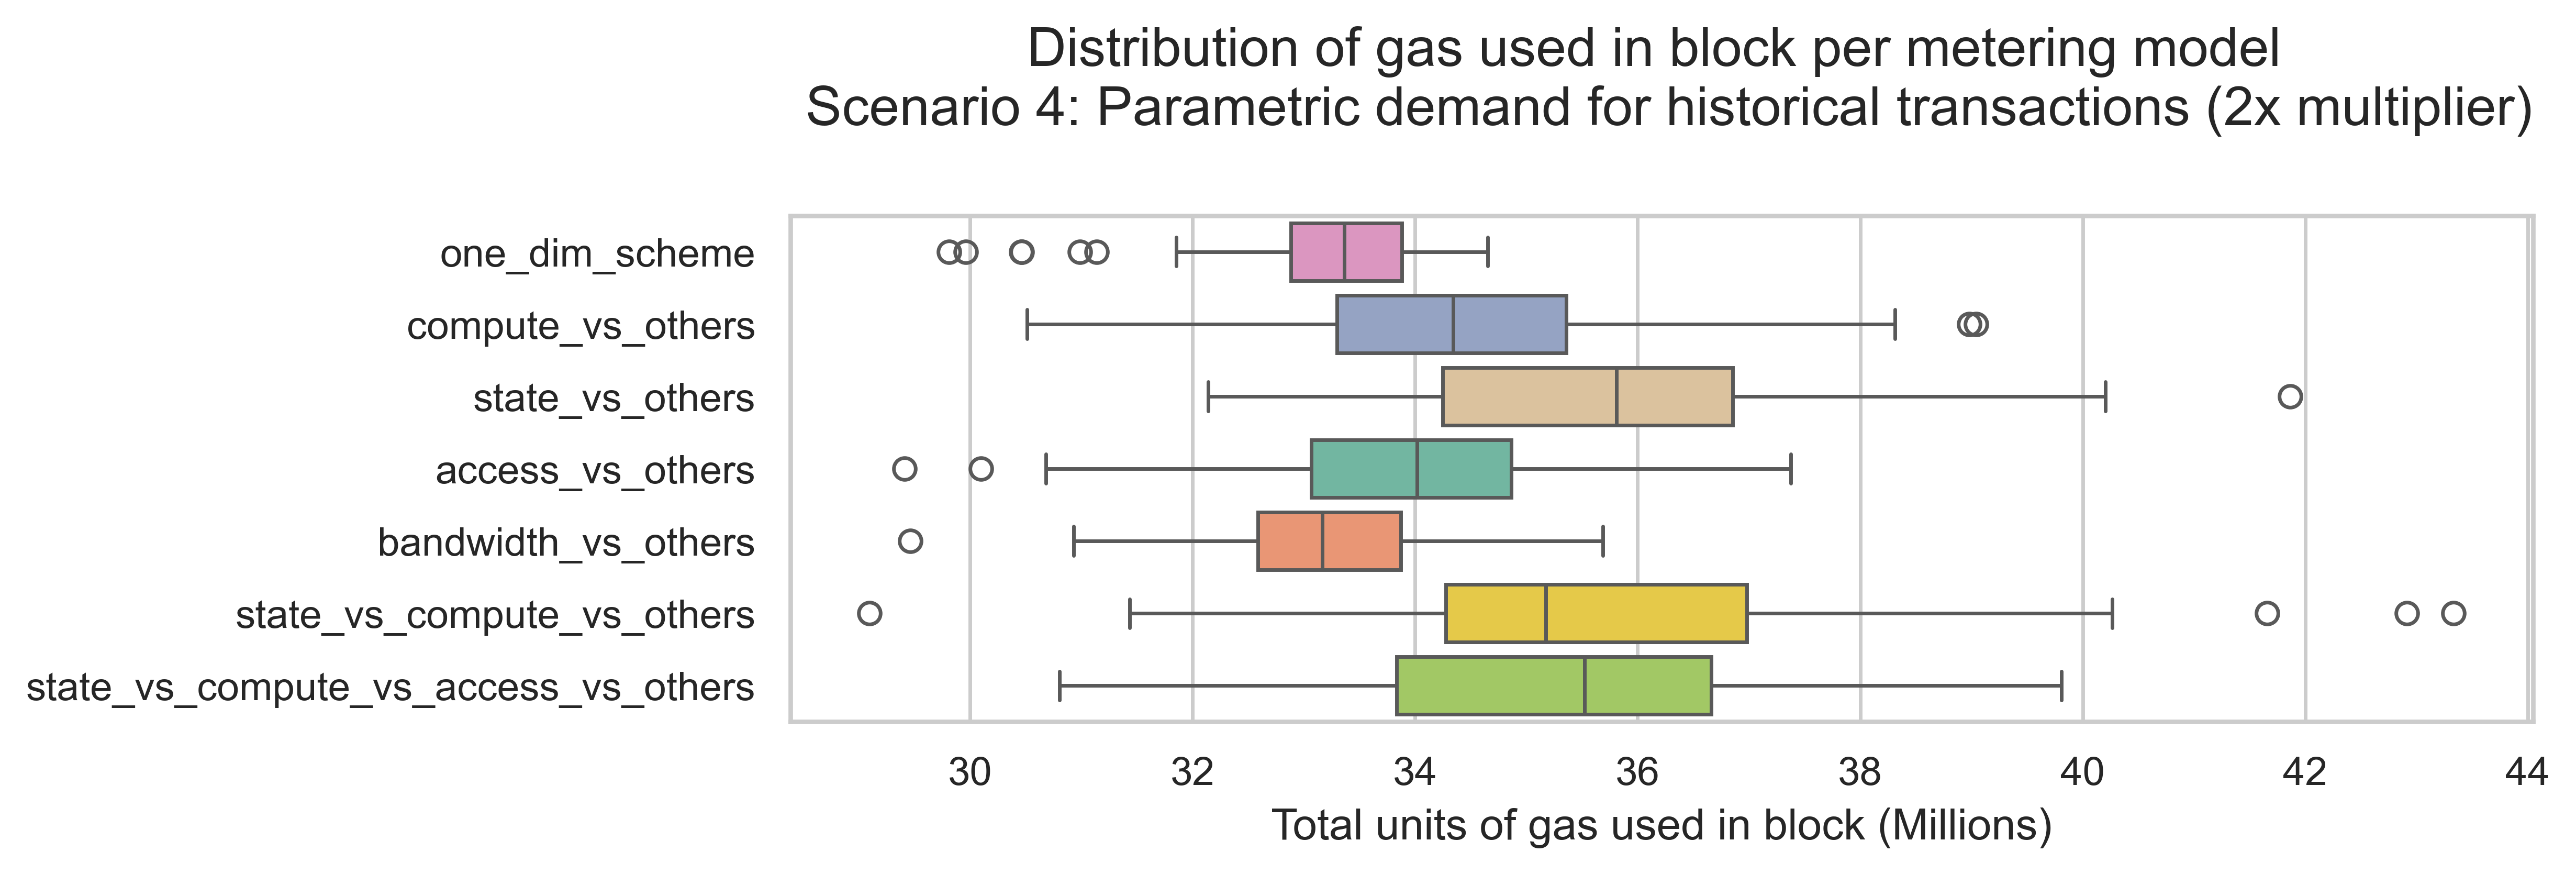

In [44]:
file_name = "historical_txs_sim_results_demand=parametric_mul=2.csv"
scenario_title = "Scenario 4: Parametric demand for historical transactions (2x multiplier)"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=limit_agg_sim_results_df[limit_agg_sim_results_df["file_name"]==file_name],
    x="gas_used_million",
    y="meter_scheme",
    hue="meter_scheme",
    order=meter_order,
    legend=False
)
plt.xlabel("Total units of gas used in block (Millions)")
plt.ylabel("")
plt.title(
    f"Distribution of gas used in block per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

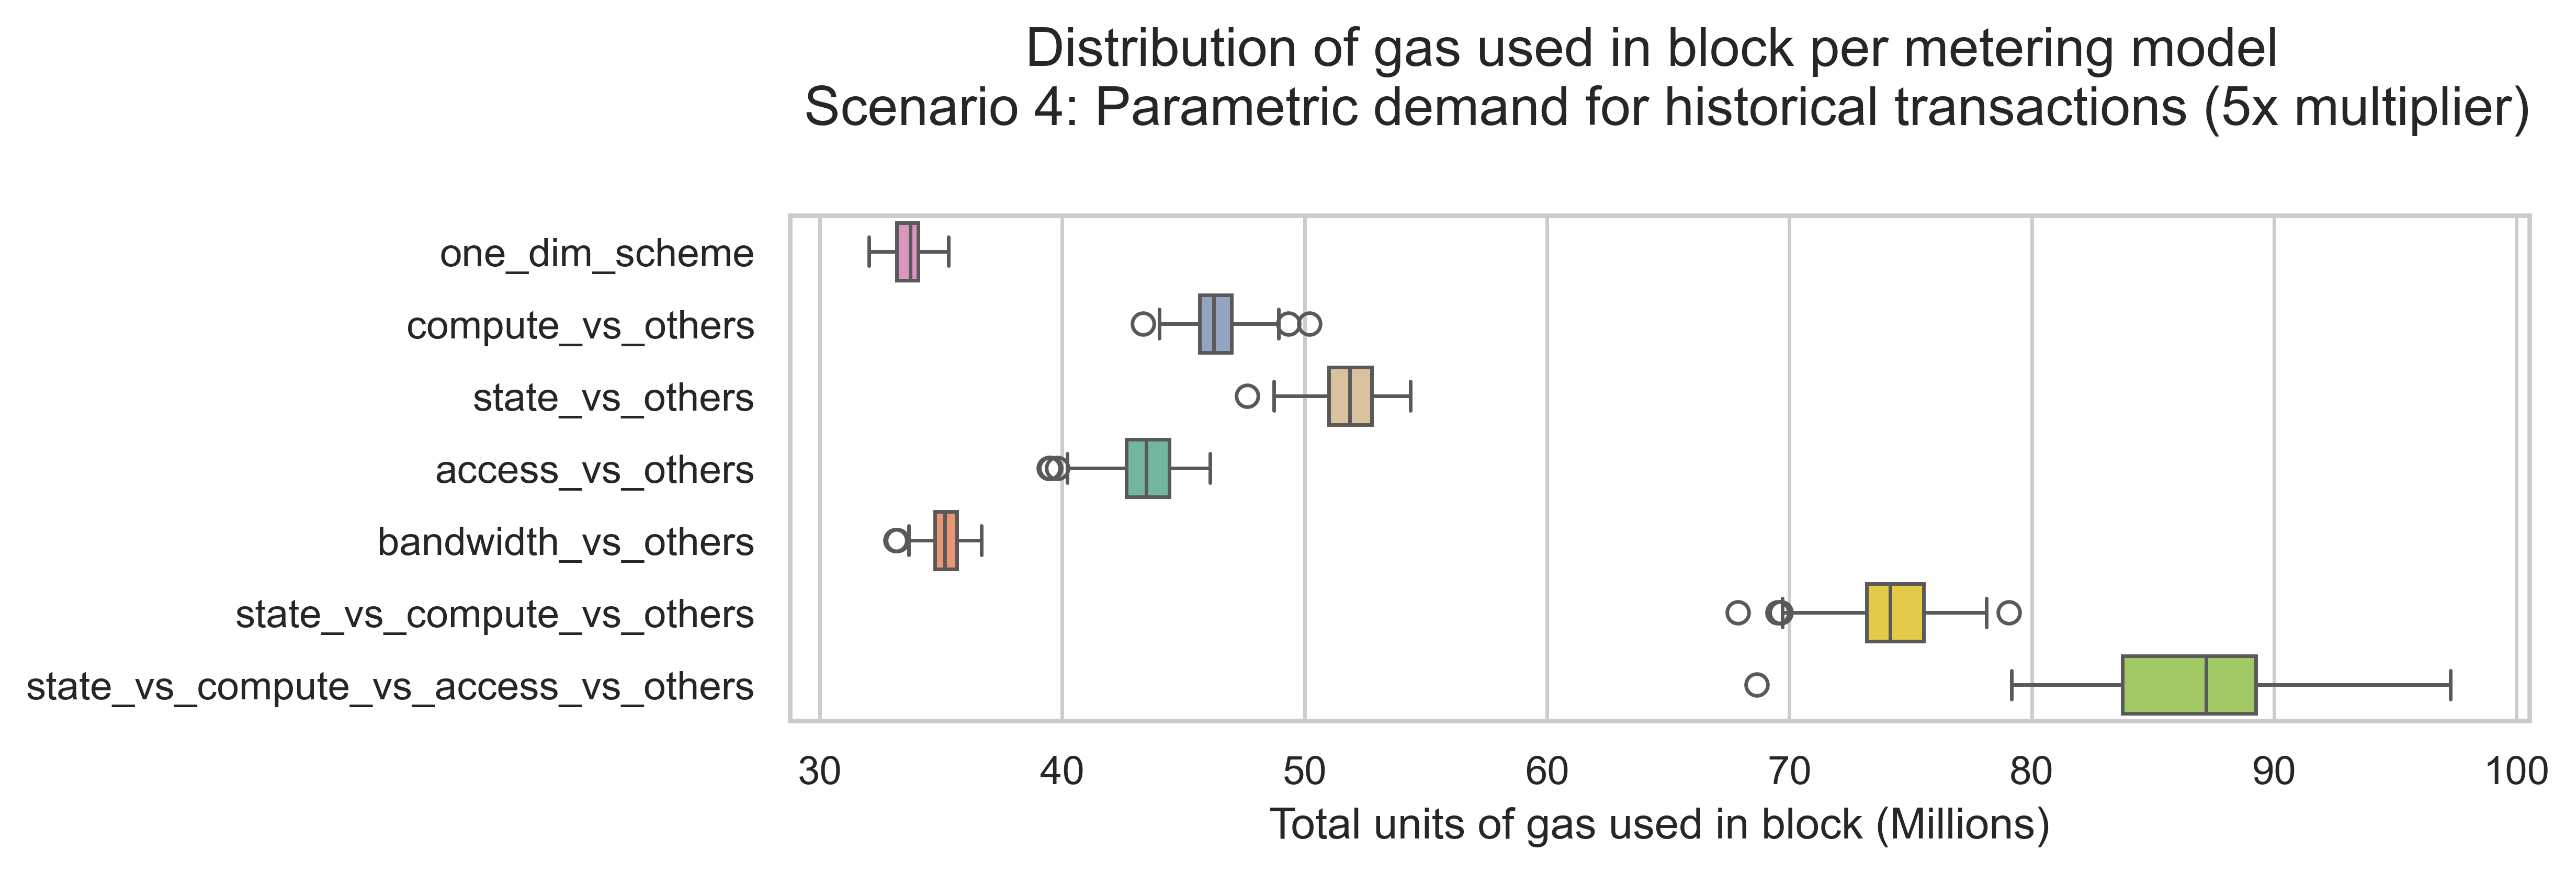

In [45]:
file_name = "historical_txs_sim_results_demand=parametric_mul=5.csv"
scenario_title = "Scenario 4: Parametric demand for historical transactions (5x multiplier)"

plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=limit_agg_sim_results_df[limit_agg_sim_results_df["file_name"]==file_name],
    x="gas_used_million",
    y="meter_scheme",
    hue="meter_scheme",
    order=meter_order,
    legend=False
)
plt.xlabel("Total units of gas used in block (Millions)")
plt.ylabel("")
plt.title(
    f"Distribution of gas used in block per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()